### **IS53024B/S/IS71039B/A: ARTIFICIAL INTELLIGENCE (2023-24)** <br>
#### **Postgraduate Coursework 1 (IS71039B^2023-24^1)Assignment**

## Introduction

Diabetes mellitus is a chronic disease characterized by hyperglycemia. It may cause many complications. According to the growing morbidity in recent years, in 2040, the world’s diabetic patients will reach 642 million, which means that one of the ten adults in the future is suffering from diabetes. There is no doubt that this alarming figure needs great attention. <br>
With the rapid development of machine learning, machine learning has been applied to many aspects of medical health. <br>

The dataset in question comprises various health indicators and lifestyle choices that are often associated with the risk of developing diabetes. The target variable, Diabetes, indicates the presence or absence of the condition in the individuals represented in the dataset. The goal is to use these features to build predictive models that can identify individuals at risk of diabetes.

The dataset was donwloaded from Kaggle (https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=diabetes_data.csv) and it was already cleaned, augmented, and have balanced classes, making it ready to use,



### Library Imports

In [412]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers
# from keras.optimizers import RMSprop
from keras import regularizers
from keras import models, layers, optimizers, regularizers
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


### Data Acquisition

In [413]:
df = pd.read_csv('diabetes_data.csv')

In [414]:
tf.random.set_seed(42) # Set seed for reproducibility  

### Data Inspection

In [415]:
df

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0               1.0     0.0      1.0                0.0      3.0       5.0   
1               0.0     1.0      0.0                0.0      3.0       0.0   
2               1.0     1.0      1.0                0.0      1.0       0.0   
3               1.0     1.0      1.0                0.0      3.0       0.0   
4               1.0     1.0      1.0                0.0      2.0       0.0   
...             ...     ...      ...                ...      ...       ...   
70687           0.0     0.0      1.0                0.0      4.0       0.0   
70688           0.0     1.0      1.0                0.0      2.0       0.0   
70689           0.0     1.0      0.0                0.0      5.0      15.0   
70690           0.0     0.0      0.0                0.0      4.0       0.0   
70691           1.0     1.0      0.0                0.0      2.0       0.0   

       PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0          30.0       0.0     0.0     1.0       0.0  
1           0.0       0.0     1.0     1.0       0.0  
2          10.0       0.0     0.0     0.0       0.0  
3           3.0       0.0     0.0     1.0       0.0  
4           0.0       0.0     0.0     0.0       0.0  
...         ...       ...     ...     ...       ...  
70687       0.0       0.0     0.0     0.0       1.0  
70688       0.0       1.0     0.0     0.0       1.0  
70689       0.0       1.0     0.0     1.0       1.0  
70690       0.0       1.0     0.0     1.0       1.0  
70691       0.0       0.0     0.0     1.0       1.0  

[70692 rows x 18 columns]

In [416]:
df.shape

(70692, 18)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [418]:
df.describe()

Age           Sex      HighChol     CholCheck           BMI  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       8.584055      0.456997      0.525703      0.975259     29.856985   
std        2.852153      0.498151      0.499342      0.155336      7.113954   
min        1.000000      0.000000      0.000000      0.000000     12.000000   
25%        7.000000      0.000000      0.000000      1.000000     25.000000   
50%        9.000000      0.000000      1.000000      1.000000     29.000000   
75%       11.000000      1.000000      1.000000      1.000000     33.000000   
max       13.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  70692.000000          70692.000000  70692.000000  70692.000000   
mean       0.475273              0.147810      0.703036      0.611795   
std        0.499392              0.354914      0.456924      0.487345   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      1.000000      1.000000   
75%        1.000000              0.000000      1.000000      1.000000   
max        1.000000              1.000000      1.000000      1.000000   

            Veggies  HvyAlcoholConsump       GenHlth      MentHlth  \
count  70692.000000       70692.000000  70692.000000  70692.000000   
mean       0.788774           0.042721      2.837082      3.752037   
std        0.408181           0.202228      1.113565      8.155627   
min        0.000000           0.000000      1.000000      0.000000   
25%        1.000000           0.000000      2.000000      0.000000   
50%        1.000000           0.000000      3.000000      0.000000   
75%        1.000000           0.000000      4.000000      2.000000   
max        1.000000           1.000000      5.000000     30.000000   

           PhysHlth      DiffWalk        Stroke        HighBP      Diabetes  
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000  
mean       5.810417      0.252730      0.062171      0.563458      0.500000  
std       10.062261      0.434581      0.241468      0.495960      0.500004  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      1.000000      0.500000  
75%        6.000000      1.000000      0.000000      1.000000      1.000000  
max       30.000000      1.000000      1.000000      1.000000      1.000000

In [419]:
print(df.isnull().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


In [420]:
class_counts = df['Diabetes'].value_counts()
print(class_counts)

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64


### Data Split

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Split data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [422]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [423]:
# Define the percentagel of the partial train set off the full train set
partial_train_size = int(0.4 * x_train.shape[0])

# Split the full training data into partial training set and the remaining part
partial_x_train = x_train[:partial_train_size]
partial_y_train = y_train[:partial_train_size]

###  Data Preprocessing and separating the predictors and the lables.

### Building the model

In [424]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001), 
                       input_shape=(x_train.shape[1],)))

model.add(layers.Dropout(0.1)) 
model.add(layers.Dense(64, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001)))

model.add(layers.Dropout(0.1))   
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [425]:
model.evaluate(partial_x_train, partial_y_train)

306/619 [=============>................] - ETA: 0s - loss: 0.6947 - accuracy: 0.5473

619/619 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.5420


[0.6950669288635254, 0.541959285736084]

### Training the model

In [426]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs= 50, 
    batch_size= 64,
    validation_data = (x_val, y_val),
    )

Epoch 1/50


310/310 [==============================] - 1s 2ms/step - loss: 0.5425 - accuracy: 0.7339 - val_loss: 0.5146 - val_accuracy: 0.7489
Epoch 2/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.7455 - val_loss: 0.5133 - val_accuracy: 0.7509
Epoch 3/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.7476 - val_loss: 0.5111 - val_accuracy: 0.7528
Epoch 4/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7499 - val_loss: 0.5114 - val_accuracy: 0.7525
Epoch 5/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7496 - val_loss: 0.5108 - val_accuracy: 0.7529
Epoch 6/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5137 - accuracy: 0.7508 - val_loss: 0.5103 - val_accuracy: 0.7510
Epoch 7/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5121 - accuracy: 0.7535 - val_loss: 0.5097 - val_accuracy: 0.7549
Epoch 8/50
310/31

In [427]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Validating the model

In [428]:
eval_results = model.evaluate(x_test, y_test)
for metric, value in zip(model.metrics_names, eval_results): # zip() returns an iterator of tuples
    print(f"{metric}: {value:.4f}")

178/332 [===============>..............] - ETA: 0s - loss: 0.5169 - accuracy: 0.7530

332/332 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7473
loss: 0.5188
accuracy: 0.7473


### Early Stopping

In [429]:
def early_stopping(history):

    # Best validation loss
    early_stopping_loss_epoch = np.argmin(history.history["val_loss"])
    print(f"Reached best validation loss {history.history['val_loss'][early_stopping_loss_epoch]} at epoch {early_stopping_loss_epoch + 1}")

    # Best validation accuracy
    global early_stopping_acc_epoch # To be used in a different cell
    early_stopping_acc_epoch = np.argmax(history.history["val_accuracy"]) + 1
    print(f"Reached best validation accuracy {history.history['val_accuracy'][early_stopping_acc_epoch]} at epoch {early_stopping_acc_epoch}")

early_stopping(history)

Reached best validation loss 0.5086024403572083 at epoch 10
Reached best validation accuracy 0.7538664937019348 at epoch 8


In [430]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Loss and Accuracy Plot

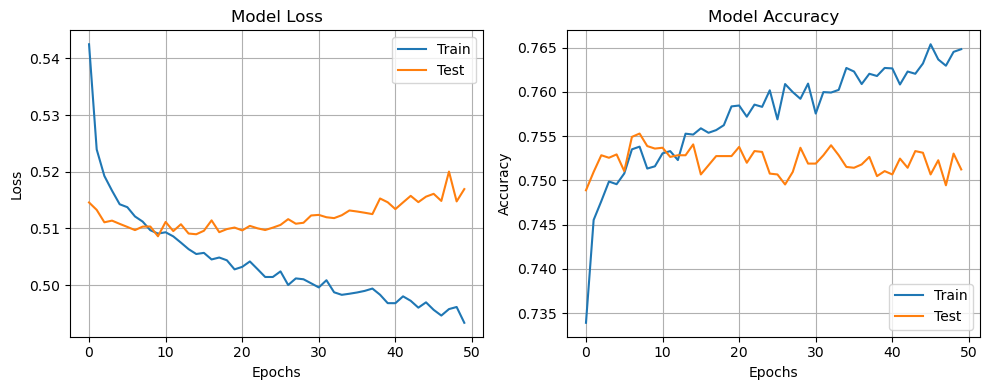

In [431]:
def plot_history(history):

    # Plotting the loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend(['Train', 'Test'], loc='upper right')

    # Plotting the accuracy
    plt.subplot(1, 2, 2) 
    plt.plot(history.history['accuracy']) 
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.tight_layout()
    plt.show()

plot_history(history)

  1/332 [..............................] - ETA: 18s

332/332 [==============================] - 0s 768us/step


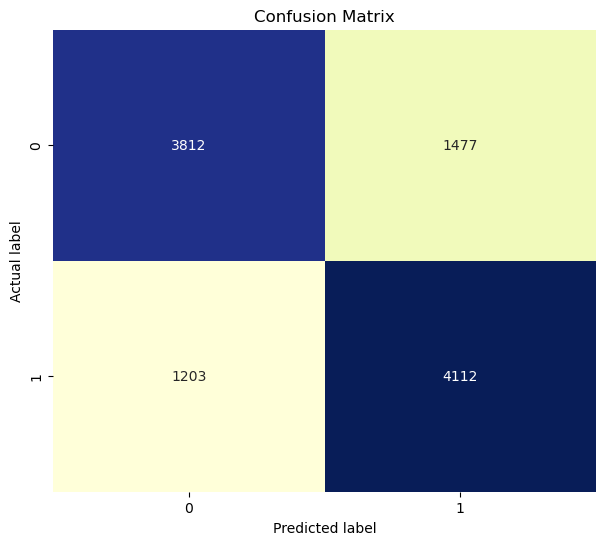

In [432]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test) #
y_pred_classes = (y_pred > 0.5).astype("int32") 

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.YlGnBu, cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


## Experiments






 Current training with Batch Size: 32, Epochs: 25, Learning Rate: 0.0001
Epoch 1/25
619/619 [==============================] - 2s 2ms/step - loss: 0.6282 - accuracy: 0.6539 - val_loss: 0.5478 - val_accuracy: 0.7338
Epoch 2/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5467 - accuracy: 0.7348 - val_loss: 0.5276 - val_accuracy: 0.7455
Epoch 3/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7371 - val_loss: 0.5214 - val_accuracy: 0.7459
Epoch 4/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.7403 - val_loss: 0.5188 - val_accuracy: 0.7491
Epoch 5/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.7439 - val_loss: 0.5171 - val_accuracy: 0.7508
Epoch 6/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7437 - val_loss: 0.5160 - val_accuracy: 0.7519
Epoch 7/25
619/619 [==============================] - 1s 2ms/step - loss: 0

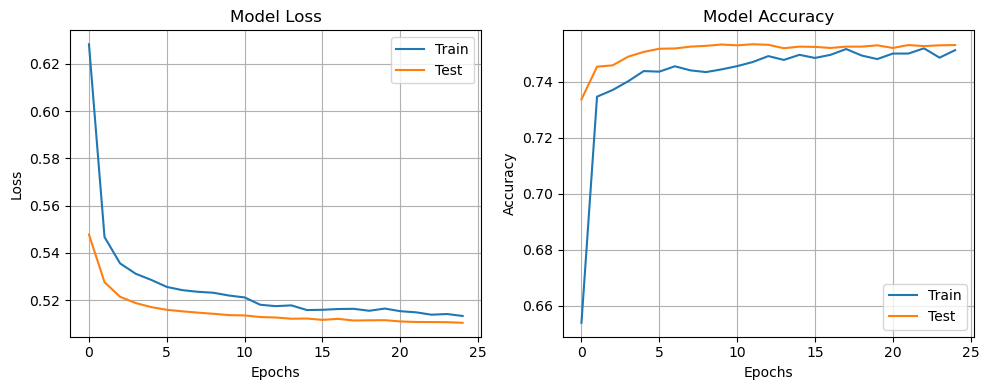

Best validation accuracy: 0.7535
Best parameters - Batch Size: 32, Epochs: 25, Learning Rate: 0.0001
Early stopping occurred at epoch: 12
 Current training with Batch Size: 32, Epochs: 25, Learning Rate: 0.001
Epoch 1/25
619/619 [==============================] - 3s 3ms/step - loss: 0.5365 - accuracy: 0.7400 - val_loss: 0.5150 - val_accuracy: 0.7519
Epoch 2/25
619/619 [==============================] - 2s 3ms/step - loss: 0.5218 - accuracy: 0.7480 - val_loss: 0.5140 - val_accuracy: 0.7525
Epoch 3/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5188 - accuracy: 0.7479 - val_loss: 0.5114 - val_accuracy: 0.7519
Epoch 4/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.7487 - val_loss: 0.5118 - val_accuracy: 0.7526
Epoch 5/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7512 - val_loss: 0.5138 - val_accuracy: 0.7497
Epoch 6/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5139

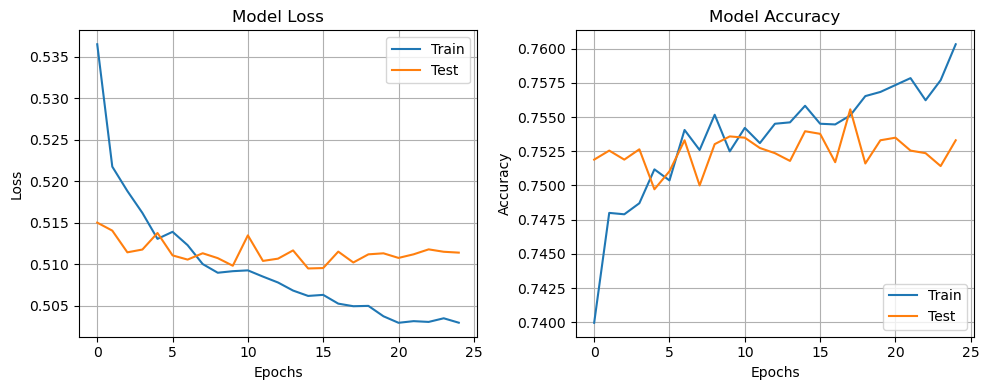

Best validation accuracy: 0.7556
Best parameters - Batch Size: 32, Epochs: 25, Learning Rate: 0.001
Early stopping occurred at epoch: 18
 Current training with Batch Size: 32, Epochs: 25, Learning Rate: 0.01
Epoch 1/25
619/619 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7418 - val_loss: 0.5357 - val_accuracy: 0.7509
Epoch 2/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7433 - val_loss: 0.5159 - val_accuracy: 0.7489
Epoch 3/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7458 - val_loss: 0.5156 - val_accuracy: 0.7524
Epoch 4/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7443 - val_loss: 0.5204 - val_accuracy: 0.7519
Epoch 5/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.7456 - val_loss: 0.5195 - val_accuracy: 0.7486
Epoch 6/25
619/619 [==============================] - 1s 2ms/step - loss: 0.5252 -

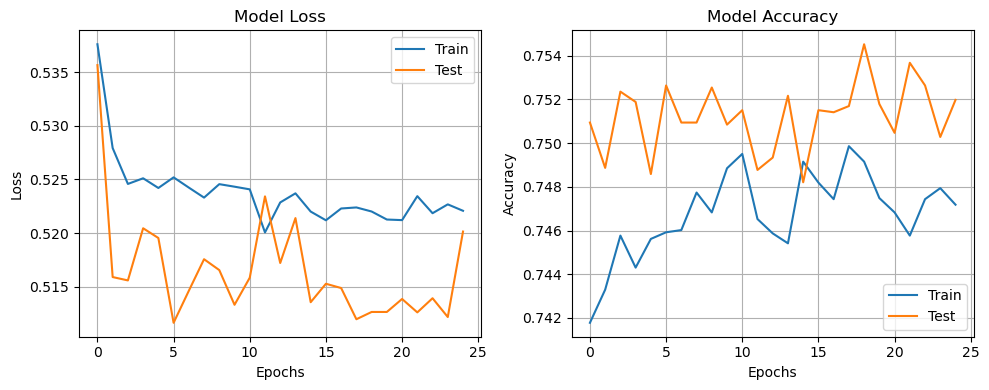

Best validation accuracy: 0.7556
Best parameters - Batch Size: 32, Epochs: 25, Learning Rate: 0.001
Early stopping occurred at epoch: 18
 Current training with Batch Size: 32, Epochs: 50, Learning Rate: 0.0001
Epoch 1/50
619/619 [==============================] - 2s 2ms/step - loss: 0.5952 - accuracy: 0.6991 - val_loss: 0.5382 - val_accuracy: 0.7426
Epoch 2/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7361 - val_loss: 0.5258 - val_accuracy: 0.7468
Epoch 3/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.7415 - val_loss: 0.5214 - val_accuracy: 0.7480
Epoch 4/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7433 - val_loss: 0.5190 - val_accuracy: 0.7505
Epoch 5/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.7435 - val_loss: 0.5174 - val_accuracy: 0.7510
Epoch 6/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5260

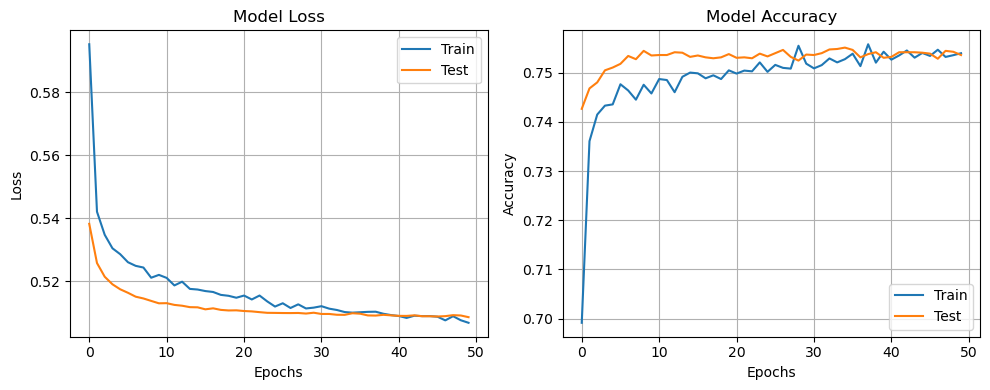

Best validation accuracy: 0.7556
Best parameters - Batch Size: 32, Epochs: 25, Learning Rate: 0.001
Early stopping occurred at epoch: 18
 Current training with Batch Size: 32, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
619/619 [==============================] - 2s 2ms/step - loss: 0.5374 - accuracy: 0.7395 - val_loss: 0.5134 - val_accuracy: 0.7511
Epoch 2/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.7475 - val_loss: 0.5143 - val_accuracy: 0.7511
Epoch 3/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7504 - val_loss: 0.5121 - val_accuracy: 0.7525
Epoch 4/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.7487 - val_loss: 0.5119 - val_accuracy: 0.7541
Epoch 5/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.7516 - val_loss: 0.5146 - val_accuracy: 0.7495
Epoch 6/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5126 

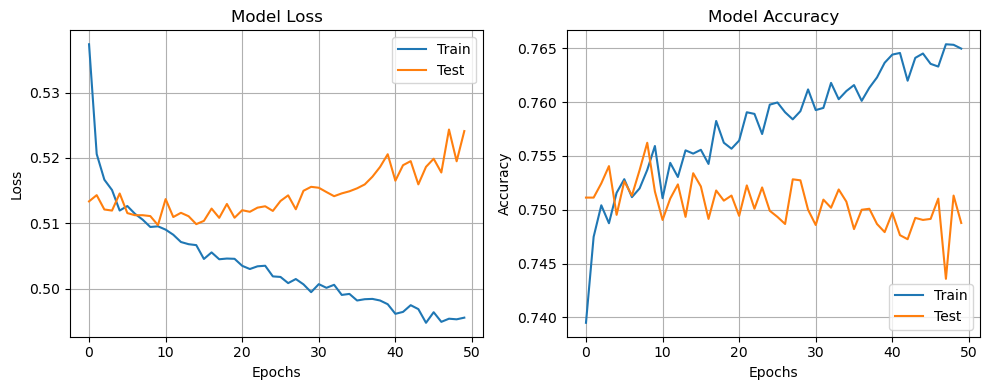

Best validation accuracy: 0.7562
Best parameters - Batch Size: 32, Epochs: 50, Learning Rate: 0.001
Early stopping occurred at epoch: 9
 Current training with Batch Size: 32, Epochs: 50, Learning Rate: 0.01
Epoch 1/50
619/619 [==============================] - 2s 3ms/step - loss: 0.5387 - accuracy: 0.7408 - val_loss: 0.5300 - val_accuracy: 0.7516
Epoch 2/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5290 - accuracy: 0.7450 - val_loss: 0.5152 - val_accuracy: 0.7525
Epoch 3/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7465 - val_loss: 0.5163 - val_accuracy: 0.7488
Epoch 4/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7452 - val_loss: 0.5174 - val_accuracy: 0.7516
Epoch 5/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.7470 - val_loss: 0.5175 - val_accuracy: 0.7501
Epoch 6/50
619/619 [==============================] - 1s 2ms/step - loss: 0.5239 - 

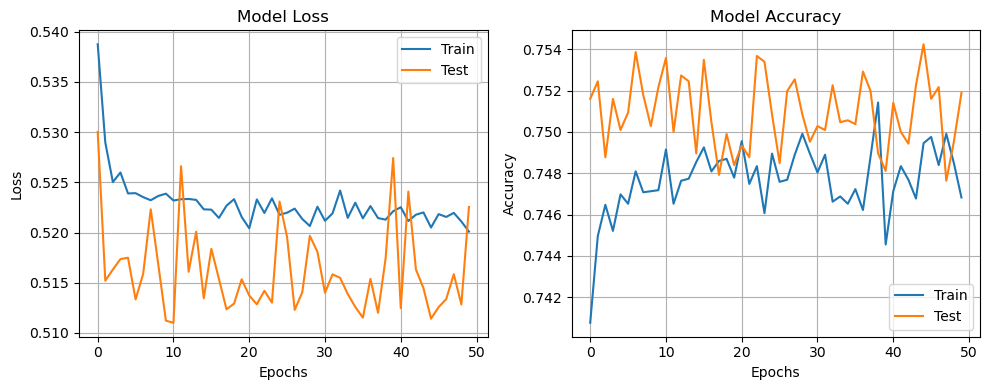

Best validation accuracy: 0.7562
Best parameters - Batch Size: 32, Epochs: 50, Learning Rate: 0.001
Early stopping occurred at epoch: 9
 Current training with Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Epoch 1/75
619/619 [==============================] - 2s 2ms/step - loss: 0.6044 - accuracy: 0.6758 - val_loss: 0.5398 - val_accuracy: 0.7396
Epoch 2/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7342 - val_loss: 0.5252 - val_accuracy: 0.7490
Epoch 3/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7401 - val_loss: 0.5205 - val_accuracy: 0.7516
Epoch 4/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.7411 - val_loss: 0.5184 - val_accuracy: 0.7510
Epoch 5/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.7431 - val_loss: 0.5170 - val_accuracy: 0.7515
Epoch 6/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5261 

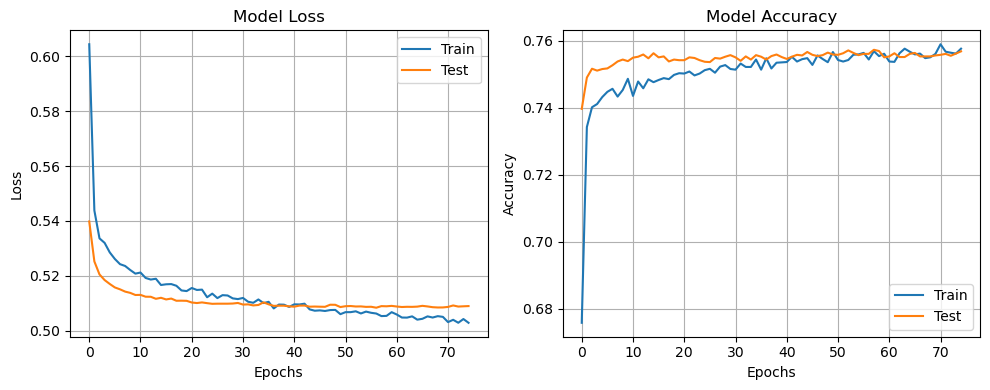

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 32, Epochs: 75, Learning Rate: 0.001
Epoch 1/75
619/619 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7364 - val_loss: 0.5124 - val_accuracy: 0.7546
Epoch 2/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5206 - accuracy: 0.7488 - val_loss: 0.5128 - val_accuracy: 0.7543
Epoch 3/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7490 - val_loss: 0.5101 - val_accuracy: 0.7543
Epoch 4/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5161 - accuracy: 0.7482 - val_loss: 0.5100 - val_accuracy: 0.7572
Epoch 5/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7505 - val_loss: 0.5134 - val_accuracy: 0.7508
Epoch 6/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5125

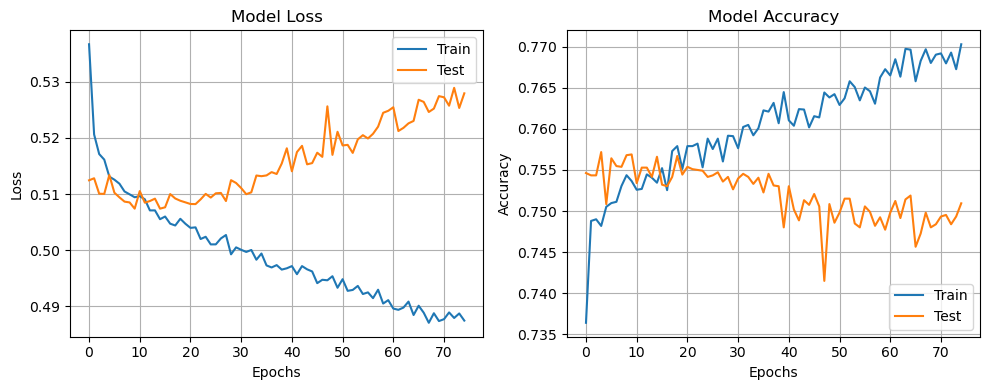

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 32, Epochs: 75, Learning Rate: 0.01
Epoch 1/75
619/619 [==============================] - 2s 2ms/step - loss: 0.5383 - accuracy: 0.7410 - val_loss: 0.5300 - val_accuracy: 0.7525
Epoch 2/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5290 - accuracy: 0.7464 - val_loss: 0.5163 - val_accuracy: 0.7499
Epoch 3/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7443 - val_loss: 0.5154 - val_accuracy: 0.7499
Epoch 4/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5241 - accuracy: 0.7449 - val_loss: 0.5213 - val_accuracy: 0.7479
Epoch 5/75
619/619 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.7461 - val_loss: 0.5237 - val_accuracy: 0.7508
Epoch 6/75
619/619 [==============================] - 2s 3ms/step - loss: 0.5247 

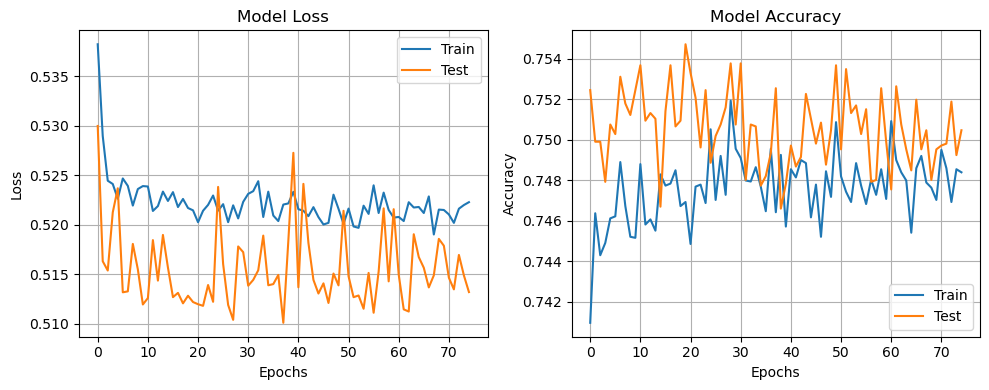

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 32, Epochs: 100, Learning Rate: 0.0001
Epoch 1/100
619/619 [==============================] - 2s 2ms/step - loss: 0.6090 - accuracy: 0.6811 - val_loss: 0.5391 - val_accuracy: 0.7408
Epoch 2/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.7350 - val_loss: 0.5231 - val_accuracy: 0.7481
Epoch 3/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7403 - val_loss: 0.5188 - val_accuracy: 0.7466
Epoch 4/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5283 - accuracy: 0.7401 - val_loss: 0.5167 - val_accuracy: 0.7489
Epoch 5/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.7476 - val_loss: 0.5154 - val_accuracy: 0.7507
Epoch 6/100
619/619 [==============================] - 1s 2ms/step - loss

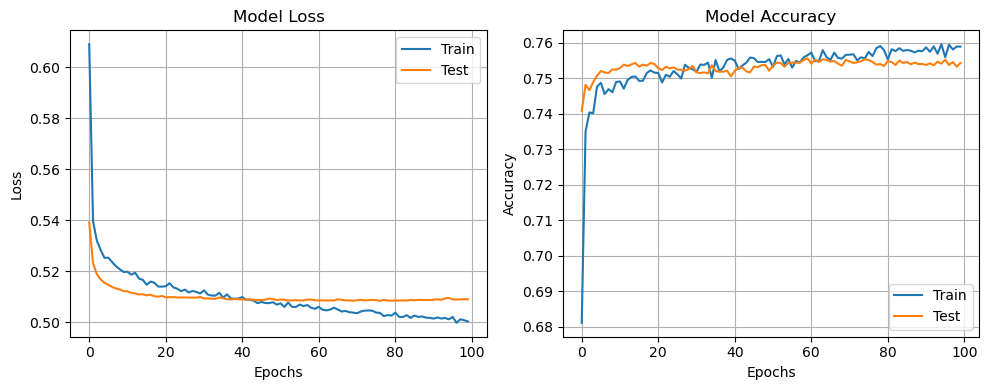

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 32, Epochs: 100, Learning Rate: 0.001
Epoch 1/100
619/619 [==============================] - 2s 2ms/step - loss: 0.5391 - accuracy: 0.7384 - val_loss: 0.5146 - val_accuracy: 0.7482
Epoch 2/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5240 - accuracy: 0.7475 - val_loss: 0.5139 - val_accuracy: 0.7513
Epoch 3/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7473 - val_loss: 0.5117 - val_accuracy: 0.7522
Epoch 4/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5168 - accuracy: 0.7478 - val_loss: 0.5112 - val_accuracy: 0.7524
Epoch 5/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5130 - accuracy: 0.7509 - val_loss: 0.5130 - val_accuracy: 0.7487
Epoch 6/100
619/619 [==============================] - 1s 2ms/step - loss:

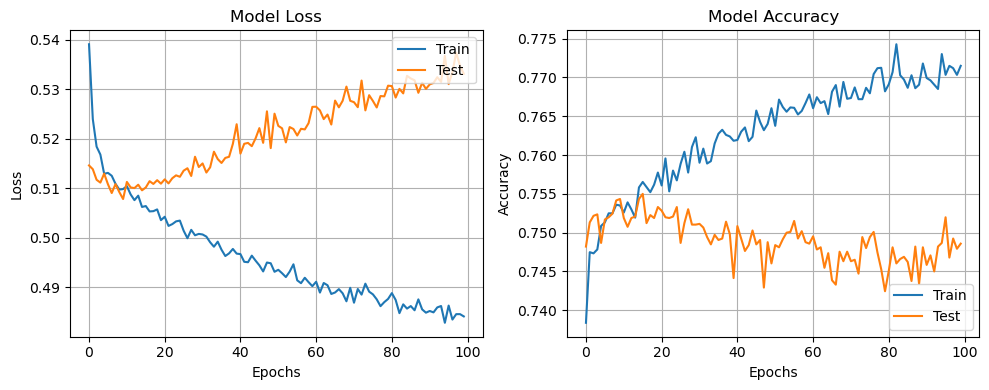

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 32, Epochs: 100, Learning Rate: 0.01
Epoch 1/100
619/619 [==============================] - 3s 3ms/step - loss: 0.5386 - accuracy: 0.7411 - val_loss: 0.5325 - val_accuracy: 0.7508
Epoch 2/100
619/619 [==============================] - 2s 3ms/step - loss: 0.5299 - accuracy: 0.7465 - val_loss: 0.5141 - val_accuracy: 0.7525
Epoch 3/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7466 - val_loss: 0.5175 - val_accuracy: 0.7498
Epoch 4/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7469 - val_loss: 0.5197 - val_accuracy: 0.7500
Epoch 5/100
619/619 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7465 - val_loss: 0.5198 - val_accuracy: 0.7502
Epoch 6/100
619/619 [==============================] - 1s 2ms/step - loss: 

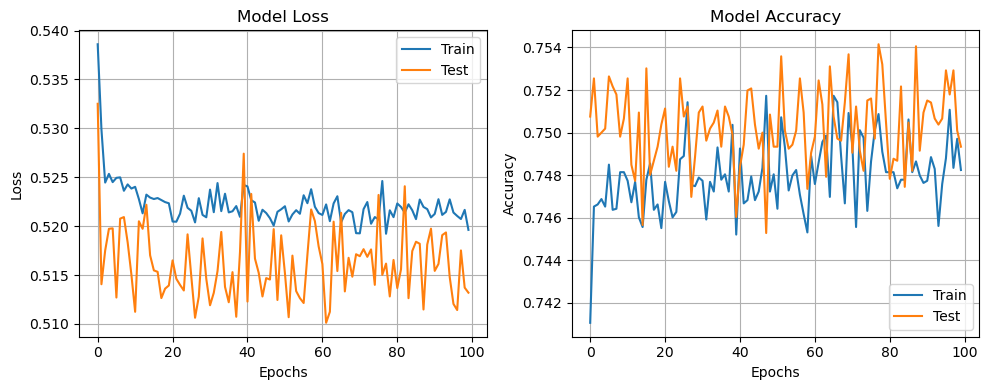

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 25, Learning Rate: 0.0001
Epoch 1/25
310/310 [==============================] - 1s 3ms/step - loss: 0.6562 - accuracy: 0.6183 - val_loss: 0.5716 - val_accuracy: 0.7276
Epoch 2/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7270 - val_loss: 0.5327 - val_accuracy: 0.7435
Epoch 3/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5393 - accuracy: 0.7367 - val_loss: 0.5241 - val_accuracy: 0.7477
Epoch 4/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7402 - val_loss: 0.5208 - val_accuracy: 0.7494
Epoch 5/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.7406 - val_loss: 0.5189 - val_accuracy: 0.7500
Epoch 6/25
310/310 [==============================] - 1s 2ms/step - loss: 0.528

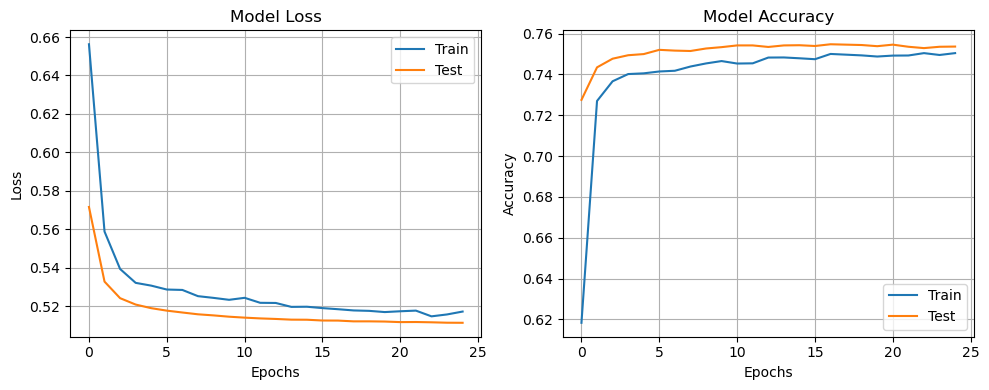

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 25, Learning Rate: 0.001
Epoch 1/25
310/310 [==============================] - 1s 3ms/step - loss: 0.5402 - accuracy: 0.7353 - val_loss: 0.5147 - val_accuracy: 0.7516
Epoch 2/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.7458 - val_loss: 0.5134 - val_accuracy: 0.7508
Epoch 3/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.7467 - val_loss: 0.5119 - val_accuracy: 0.7521
Epoch 4/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5172 - accuracy: 0.7475 - val_loss: 0.5107 - val_accuracy: 0.7538
Epoch 5/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.7484 - val_loss: 0.5108 - val_accuracy: 0.7506
Epoch 6/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5132

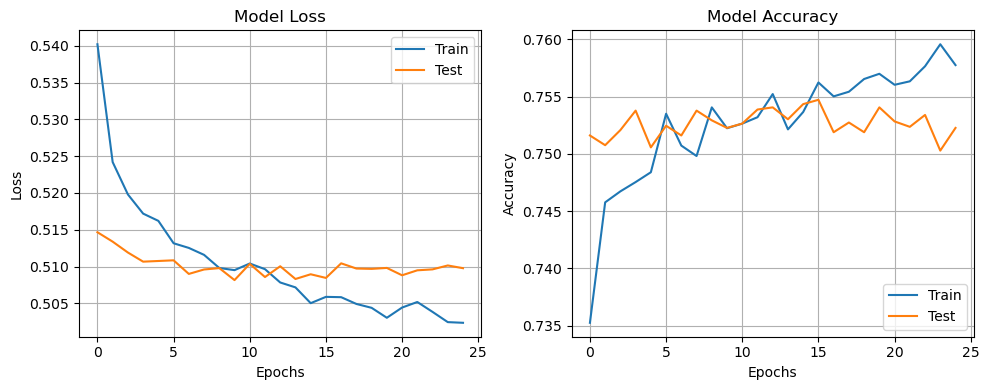

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 25, Learning Rate: 0.01
Epoch 1/25
310/310 [==============================] - 1s 3ms/step - loss: 0.5370 - accuracy: 0.7422 - val_loss: 0.5116 - val_accuracy: 0.7509
Epoch 2/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7460 - val_loss: 0.5138 - val_accuracy: 0.7517
Epoch 3/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5232 - accuracy: 0.7473 - val_loss: 0.5144 - val_accuracy: 0.7496
Epoch 4/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5219 - accuracy: 0.7454 - val_loss: 0.5140 - val_accuracy: 0.7529
Epoch 5/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5190 - accuracy: 0.7489 - val_loss: 0.5148 - val_accuracy: 0.7521
Epoch 6/25
310/310 [==============================] - 1s 2ms/step - loss: 0.5191 

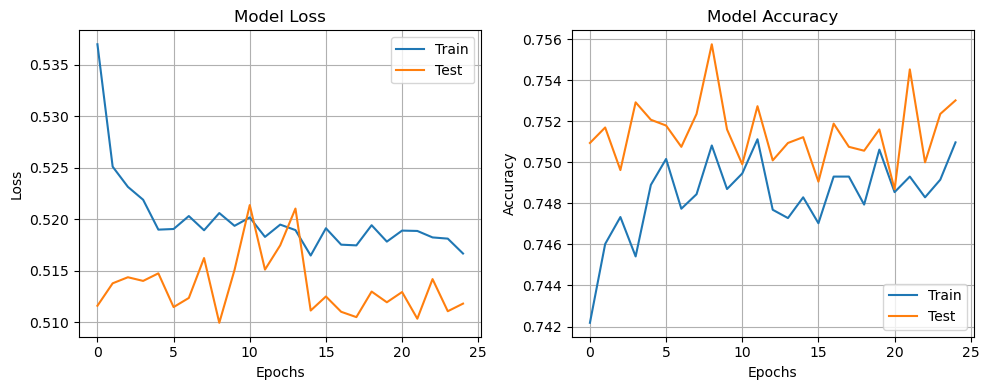

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 50, Learning Rate: 0.0001
Epoch 1/50
310/310 [==============================] - 1s 3ms/step - loss: 0.5898 - accuracy: 0.6961 - val_loss: 0.5458 - val_accuracy: 0.7388
Epoch 2/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5456 - accuracy: 0.7327 - val_loss: 0.5300 - val_accuracy: 0.7455
Epoch 3/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7390 - val_loss: 0.5241 - val_accuracy: 0.7462
Epoch 4/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7424 - val_loss: 0.5215 - val_accuracy: 0.7483
Epoch 5/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5296 - accuracy: 0.7424 - val_loss: 0.5197 - val_accuracy: 0.7480
Epoch 6/50
310/310 [==============================] - 1s 2ms/step - loss: 0.526

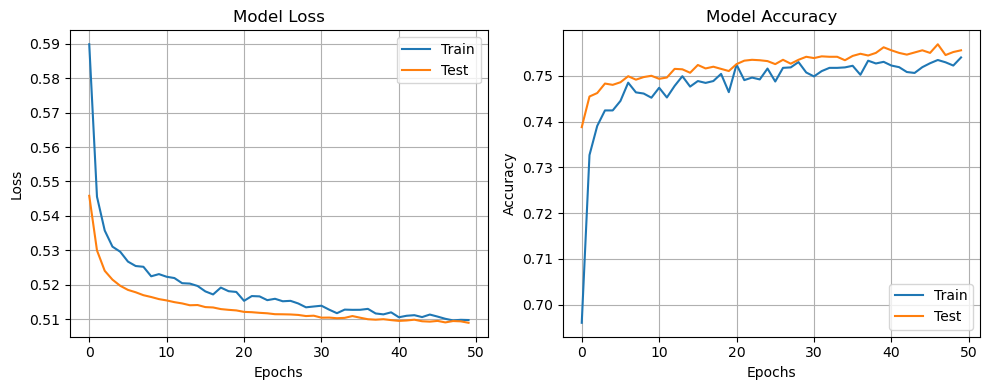

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
310/310 [==============================] - 1s 3ms/step - loss: 0.5460 - accuracy: 0.7309 - val_loss: 0.5141 - val_accuracy: 0.7511
Epoch 2/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5226 - accuracy: 0.7460 - val_loss: 0.5137 - val_accuracy: 0.7537
Epoch 3/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5186 - accuracy: 0.7493 - val_loss: 0.5124 - val_accuracy: 0.7522
Epoch 4/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7500 - val_loss: 0.5119 - val_accuracy: 0.7543
Epoch 5/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.7511 - val_loss: 0.5116 - val_accuracy: 0.7528
Epoch 6/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5125

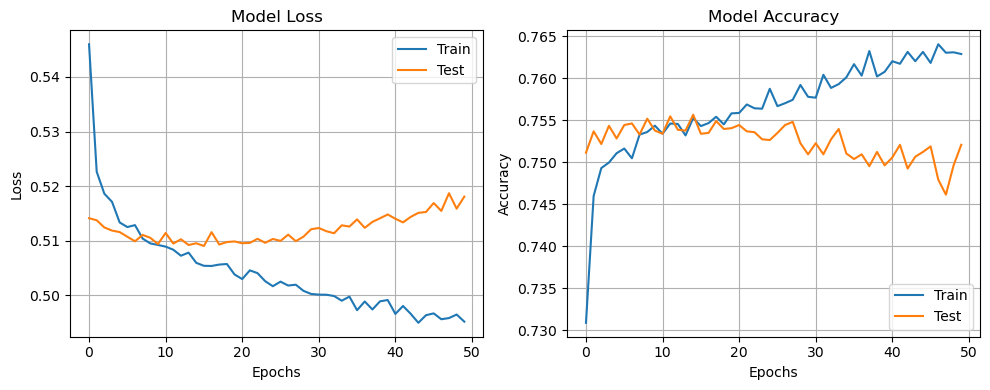

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 50, Learning Rate: 0.01
Epoch 1/50
310/310 [==============================] - 1s 3ms/step - loss: 0.5353 - accuracy: 0.7427 - val_loss: 0.5116 - val_accuracy: 0.7521
Epoch 2/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7471 - val_loss: 0.5141 - val_accuracy: 0.7525
Epoch 3/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5219 - accuracy: 0.7469 - val_loss: 0.5146 - val_accuracy: 0.7516
Epoch 4/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5222 - accuracy: 0.7470 - val_loss: 0.5132 - val_accuracy: 0.7549
Epoch 5/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.7481 - val_loss: 0.5166 - val_accuracy: 0.7500
Epoch 6/50
310/310 [==============================] - 1s 2ms/step - loss: 0.5200 

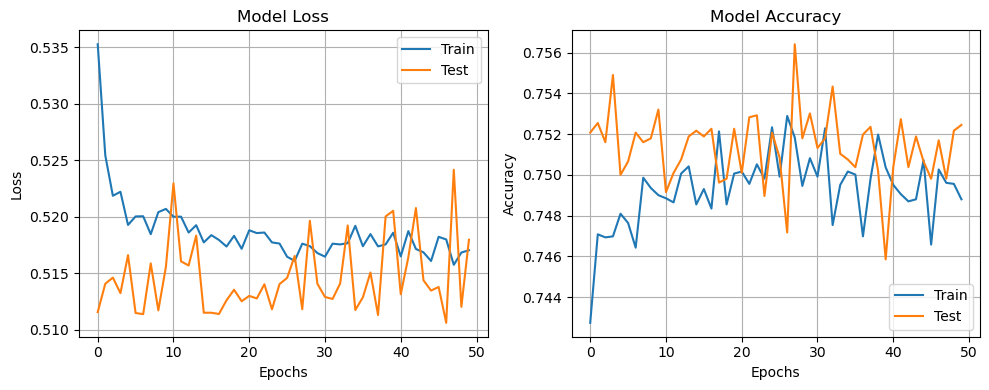

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 75, Learning Rate: 0.0001
Epoch 1/75
310/310 [==============================] - 1s 3ms/step - loss: 0.6300 - accuracy: 0.6495 - val_loss: 0.5558 - val_accuracy: 0.7253
Epoch 2/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7256 - val_loss: 0.5306 - val_accuracy: 0.7418
Epoch 3/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5413 - accuracy: 0.7354 - val_loss: 0.5225 - val_accuracy: 0.7484
Epoch 4/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7400 - val_loss: 0.5189 - val_accuracy: 0.7481
Epoch 5/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.7435 - val_loss: 0.5169 - val_accuracy: 0.7486
Epoch 6/75
310/310 [==============================] - 1s 2ms/step - loss: 0.528

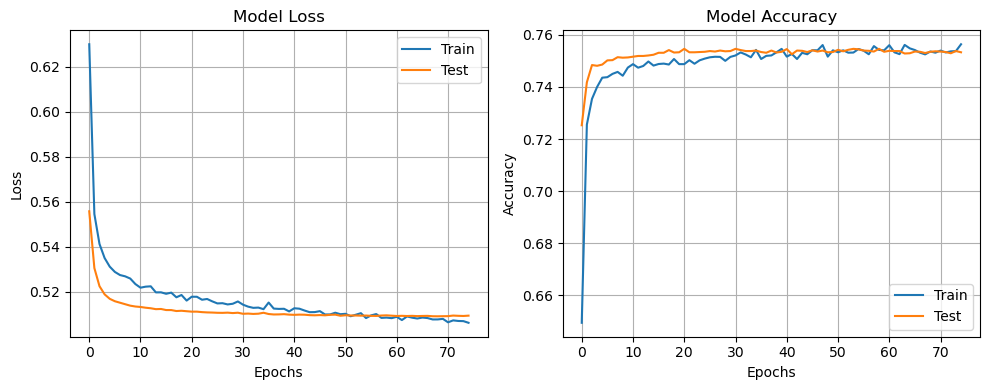

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 75, Learning Rate: 0.001
Epoch 1/75
310/310 [==============================] - 1s 3ms/step - loss: 0.5447 - accuracy: 0.7262 - val_loss: 0.5161 - val_accuracy: 0.7515
Epoch 2/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5241 - accuracy: 0.7468 - val_loss: 0.5145 - val_accuracy: 0.7546
Epoch 3/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5207 - accuracy: 0.7474 - val_loss: 0.5118 - val_accuracy: 0.7531
Epoch 4/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5169 - accuracy: 0.7475 - val_loss: 0.5115 - val_accuracy: 0.7554
Epoch 5/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.7498 - val_loss: 0.5110 - val_accuracy: 0.7521
Epoch 6/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5142

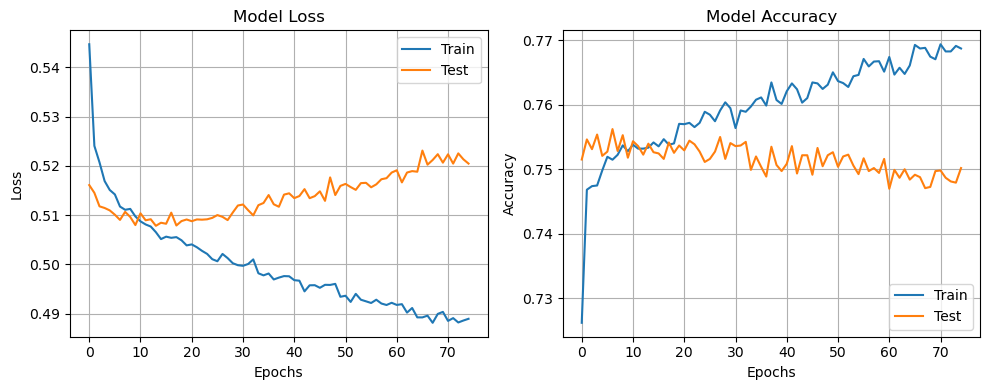

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 75, Learning Rate: 0.01
Epoch 1/75
310/310 [==============================] - 1s 3ms/step - loss: 0.5362 - accuracy: 0.7395 - val_loss: 0.5102 - val_accuracy: 0.7532
Epoch 2/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5235 - accuracy: 0.7466 - val_loss: 0.5138 - val_accuracy: 0.7509
Epoch 3/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5232 - accuracy: 0.7463 - val_loss: 0.5133 - val_accuracy: 0.7520
Epoch 4/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5221 - accuracy: 0.7472 - val_loss: 0.5127 - val_accuracy: 0.7525
Epoch 5/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5195 - accuracy: 0.7471 - val_loss: 0.5148 - val_accuracy: 0.7495
Epoch 6/75
310/310 [==============================] - 1s 2ms/step - loss: 0.5208 

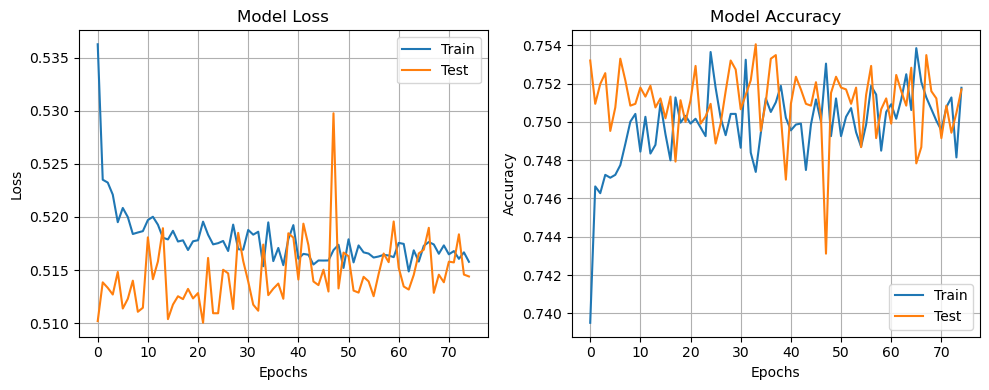

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 100, Learning Rate: 0.0001
Epoch 1/100
310/310 [==============================] - 2s 3ms/step - loss: 0.6388 - accuracy: 0.6543 - val_loss: 0.5727 - val_accuracy: 0.7255
Epoch 2/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.7263 - val_loss: 0.5369 - val_accuracy: 0.7393
Epoch 3/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7360 - val_loss: 0.5269 - val_accuracy: 0.7467
Epoch 4/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.7396 - val_loss: 0.5228 - val_accuracy: 0.7488
Epoch 5/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7399 - val_loss: 0.5202 - val_accuracy: 0.7506
Epoch 6/100
310/310 [==============================] - 1s 2ms/step - loss

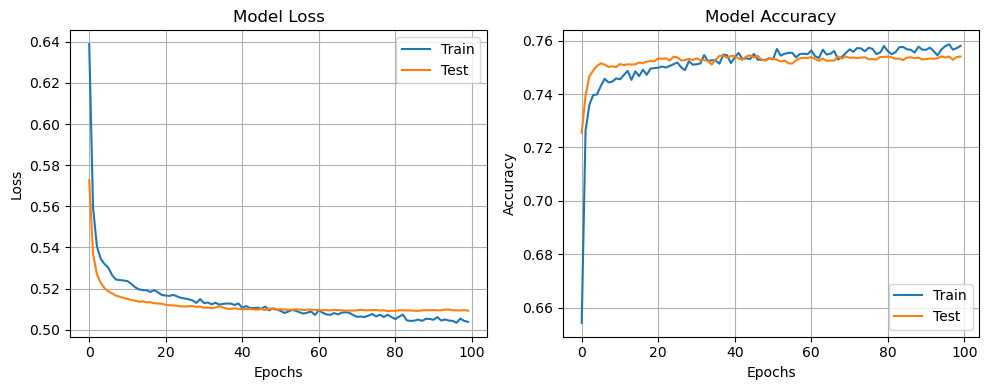

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 100, Learning Rate: 0.001
Epoch 1/100
310/310 [==============================] - 1s 3ms/step - loss: 0.5449 - accuracy: 0.7306 - val_loss: 0.5154 - val_accuracy: 0.7485
Epoch 2/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7451 - val_loss: 0.5144 - val_accuracy: 0.7522
Epoch 3/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5214 - accuracy: 0.7477 - val_loss: 0.5135 - val_accuracy: 0.7516
Epoch 4/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.7492 - val_loss: 0.5115 - val_accuracy: 0.7537
Epoch 5/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5152 - accuracy: 0.7509 - val_loss: 0.5112 - val_accuracy: 0.7532
Epoch 6/100
310/310 [==============================] - 1s 2ms/step - loss:

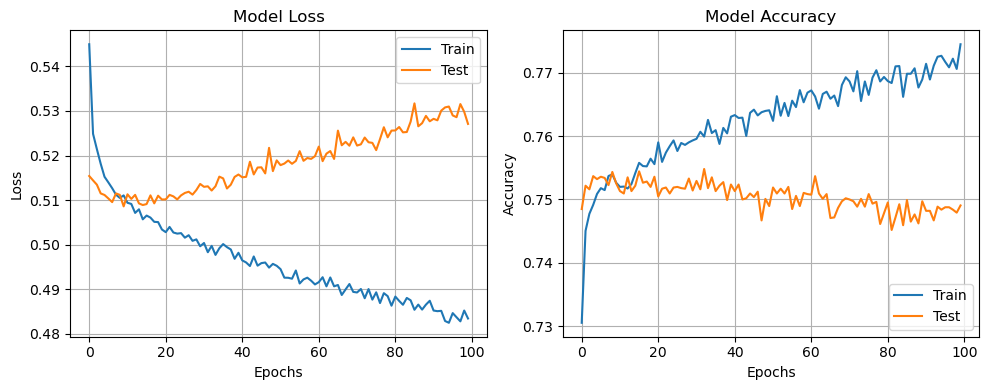

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 64, Epochs: 100, Learning Rate: 0.01
Epoch 1/100
310/310 [==============================] - 1s 3ms/step - loss: 0.5363 - accuracy: 0.7412 - val_loss: 0.5130 - val_accuracy: 0.7514
Epoch 2/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5240 - accuracy: 0.7458 - val_loss: 0.5137 - val_accuracy: 0.7518
Epoch 3/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5229 - accuracy: 0.7479 - val_loss: 0.5167 - val_accuracy: 0.7490
Epoch 4/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5223 - accuracy: 0.7482 - val_loss: 0.5127 - val_accuracy: 0.7527
Epoch 5/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5201 - accuracy: 0.7493 - val_loss: 0.5161 - val_accuracy: 0.7502
Epoch 6/100
310/310 [==============================] - 1s 2ms/step - loss: 

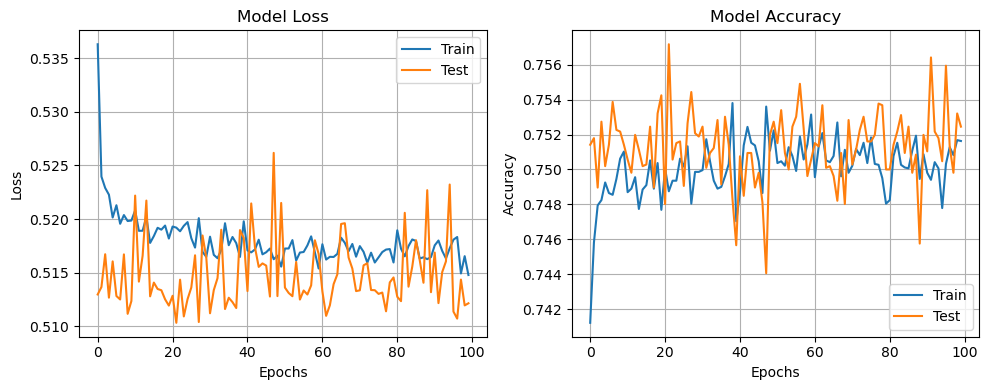

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 25, Learning Rate: 0.0001
Epoch 1/25
155/155 [==============================] - 1s 4ms/step - loss: 0.6862 - accuracy: 0.5722 - val_loss: 0.6134 - val_accuracy: 0.7058
Epoch 2/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7109 - val_loss: 0.5565 - val_accuracy: 0.7310
Epoch 3/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7295 - val_loss: 0.5366 - val_accuracy: 0.7376
Epoch 4/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7361 - val_loss: 0.5292 - val_accuracy: 0.7437
Epoch 5/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7384 - val_loss: 0.5252 - val_accuracy: 0.7456
Epoch 6/25
155/155 [==============================] - 0s 2ms/step - loss: 0.53

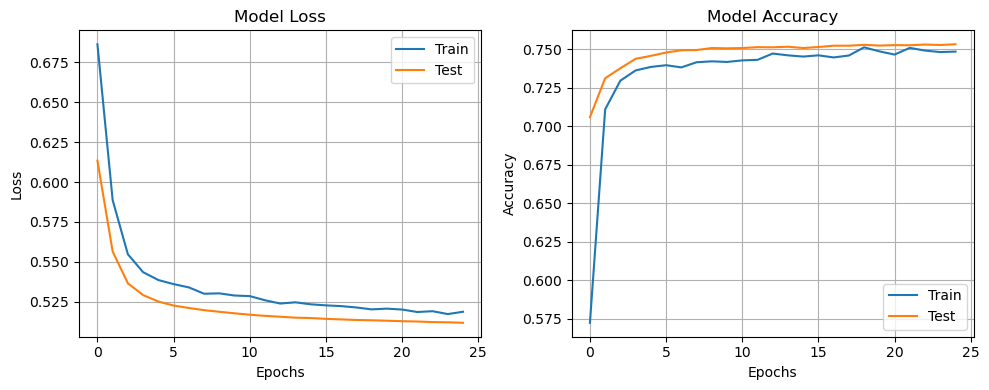

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 25, Learning Rate: 0.001
Epoch 1/25
155/155 [==============================] - 1s 3ms/step - loss: 0.5451 - accuracy: 0.7346 - val_loss: 0.5160 - val_accuracy: 0.7515
Epoch 2/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7429 - val_loss: 0.5158 - val_accuracy: 0.7519
Epoch 3/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7471 - val_loss: 0.5122 - val_accuracy: 0.7525
Epoch 4/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7483 - val_loss: 0.5110 - val_accuracy: 0.7538
Epoch 5/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7512 - val_loss: 0.5113 - val_accuracy: 0.7530
Epoch 6/25
155/155 [==============================] - 0s 2ms/step - loss: 0.515

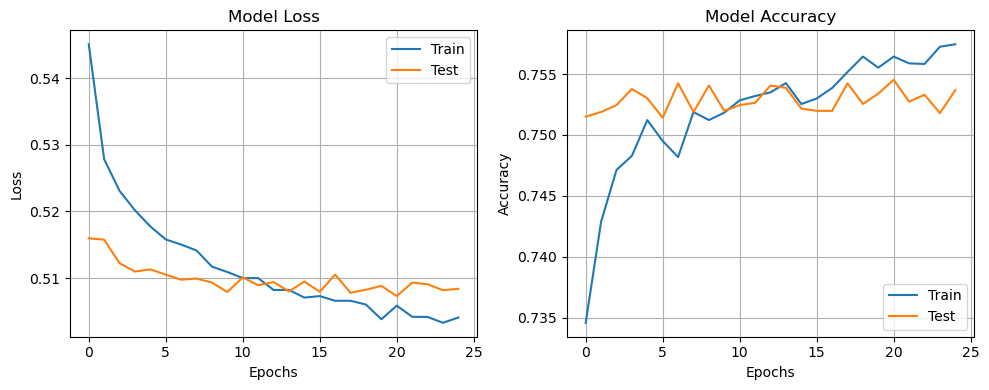

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 25, Learning Rate: 0.01
Epoch 1/25
155/155 [==============================] - 1s 3ms/step - loss: 0.5350 - accuracy: 0.7400 - val_loss: 0.5145 - val_accuracy: 0.7535
Epoch 2/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.7495 - val_loss: 0.5137 - val_accuracy: 0.7506
Epoch 3/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7494 - val_loss: 0.5130 - val_accuracy: 0.7516
Epoch 4/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7462 - val_loss: 0.5188 - val_accuracy: 0.7554
Epoch 5/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7495 - val_loss: 0.5238 - val_accuracy: 0.7490
Epoch 6/25
155/155 [==============================] - 0s 2ms/step - loss: 0.5161

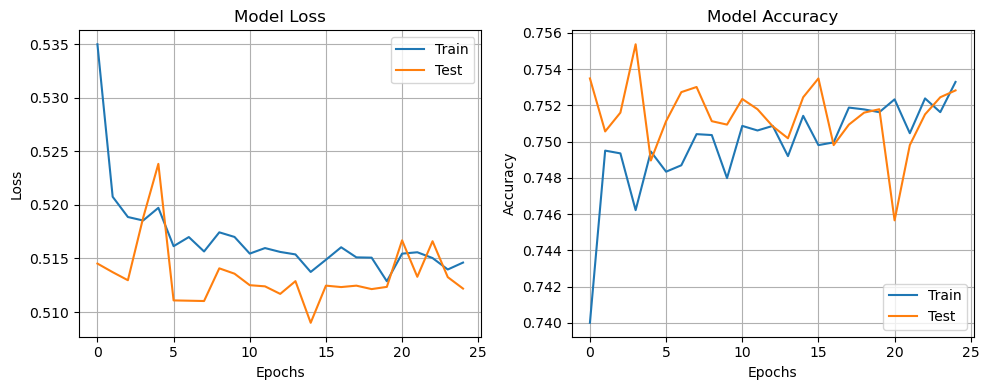

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 50, Learning Rate: 0.0001
Epoch 1/50
155/155 [==============================] - 1s 3ms/step - loss: 0.6449 - accuracy: 0.6346 - val_loss: 0.5847 - val_accuracy: 0.7196
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.7219 - val_loss: 0.5410 - val_accuracy: 0.7406
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7321 - val_loss: 0.5280 - val_accuracy: 0.7452
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7376 - val_loss: 0.5231 - val_accuracy: 0.7476
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7383 - val_loss: 0.5203 - val_accuracy: 0.7490
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.53

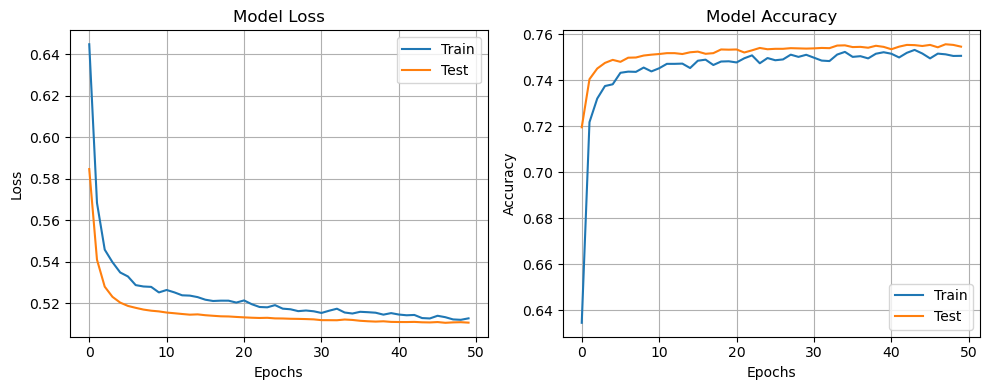

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
155/155 [==============================] - 1s 3ms/step - loss: 0.5480 - accuracy: 0.7302 - val_loss: 0.5184 - val_accuracy: 0.7506
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7458 - val_loss: 0.5162 - val_accuracy: 0.7517
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7478 - val_loss: 0.5135 - val_accuracy: 0.7512
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7483 - val_loss: 0.5125 - val_accuracy: 0.7540
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5177 - accuracy: 0.7486 - val_loss: 0.5121 - val_accuracy: 0.7540
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.516

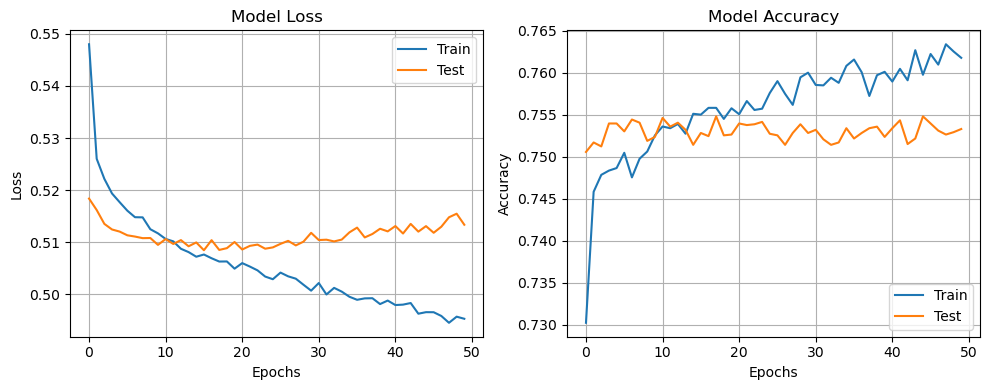

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 50, Learning Rate: 0.01
Epoch 1/50
155/155 [==============================] - 1s 3ms/step - loss: 0.5341 - accuracy: 0.7392 - val_loss: 0.5128 - val_accuracy: 0.7532
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7480 - val_loss: 0.5147 - val_accuracy: 0.7519
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7488 - val_loss: 0.5124 - val_accuracy: 0.7506
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7484 - val_loss: 0.5196 - val_accuracy: 0.7547
Epoch 5/50
155/155 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7494 - val_loss: 0.5263 - val_accuracy: 0.7458
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.5173

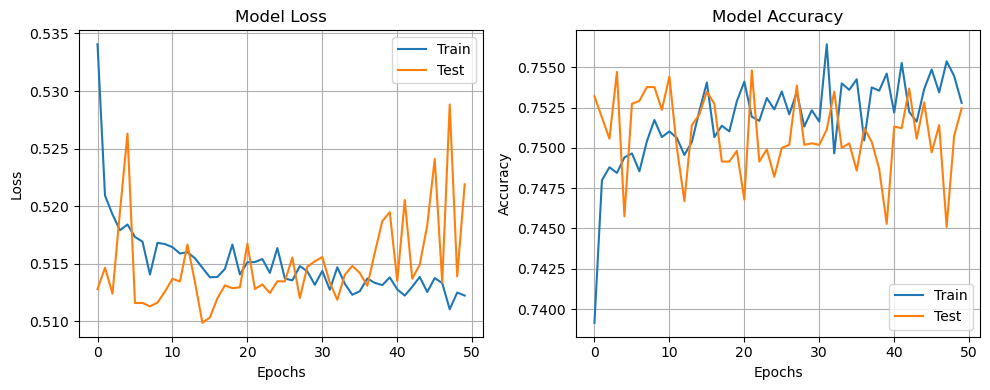

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 75, Learning Rate: 0.0001
Epoch 1/75
155/155 [==============================] - 1s 3ms/step - loss: 0.6470 - accuracy: 0.6423 - val_loss: 0.6043 - val_accuracy: 0.7017
Epoch 2/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7039 - val_loss: 0.5621 - val_accuracy: 0.7260
Epoch 3/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7243 - val_loss: 0.5412 - val_accuracy: 0.7372
Epoch 4/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7333 - val_loss: 0.5312 - val_accuracy: 0.7456
Epoch 5/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7361 - val_loss: 0.5263 - val_accuracy: 0.7475
Epoch 6/75
155/155 [==============================] - 0s 2ms/step - loss: 0.53

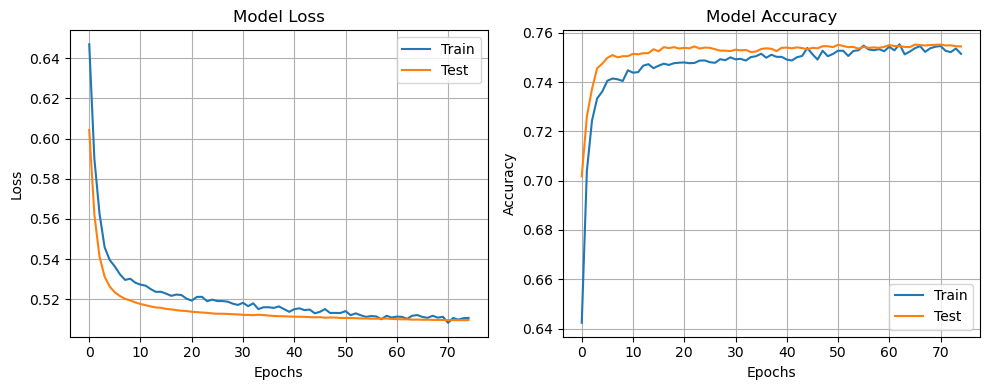

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 75, Learning Rate: 0.001
Epoch 1/75
155/155 [==============================] - 1s 3ms/step - loss: 0.5571 - accuracy: 0.7207 - val_loss: 0.5170 - val_accuracy: 0.7496
Epoch 2/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7440 - val_loss: 0.5158 - val_accuracy: 0.7529
Epoch 3/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7462 - val_loss: 0.5123 - val_accuracy: 0.7544
Epoch 4/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.7496 - val_loss: 0.5122 - val_accuracy: 0.7555
Epoch 5/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7510 - val_loss: 0.5114 - val_accuracy: 0.7550
Epoch 6/75
155/155 [==============================] - 0s 2ms/step - loss: 0.514

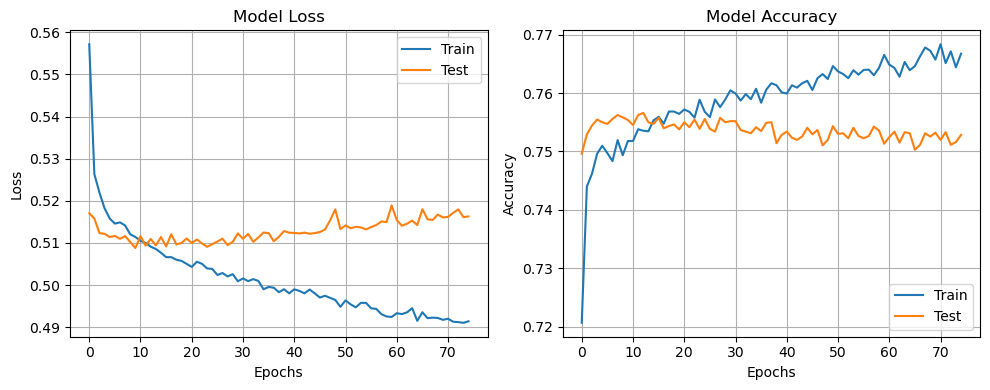

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 75, Learning Rate: 0.01
Epoch 1/75
155/155 [==============================] - 1s 3ms/step - loss: 0.5349 - accuracy: 0.7418 - val_loss: 0.5146 - val_accuracy: 0.7531
Epoch 2/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7476 - val_loss: 0.5141 - val_accuracy: 0.7522
Epoch 3/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7489 - val_loss: 0.5120 - val_accuracy: 0.7526
Epoch 4/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7487 - val_loss: 0.5181 - val_accuracy: 0.7546
Epoch 5/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7486 - val_loss: 0.5265 - val_accuracy: 0.7454
Epoch 6/75
155/155 [==============================] - 0s 2ms/step - loss: 0.5161

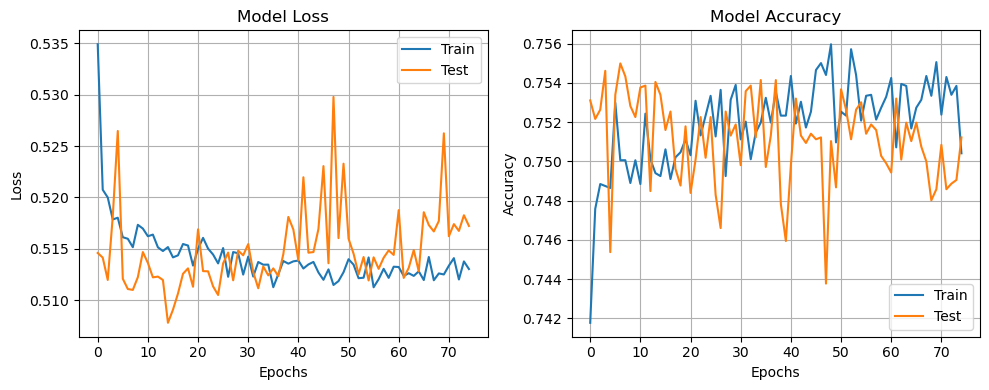

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 100, Learning Rate: 0.0001
Epoch 1/100
155/155 [==============================] - 1s 3ms/step - loss: 0.6332 - accuracy: 0.6629 - val_loss: 0.5816 - val_accuracy: 0.7253
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.7194 - val_loss: 0.5457 - val_accuracy: 0.7389
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7333 - val_loss: 0.5325 - val_accuracy: 0.7442
Epoch 4/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7383 - val_loss: 0.5264 - val_accuracy: 0.7480
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7401 - val_loss: 0.5227 - val_accuracy: 0.7491
Epoch 6/100
155/155 [==============================] - 0s 2ms/step - los

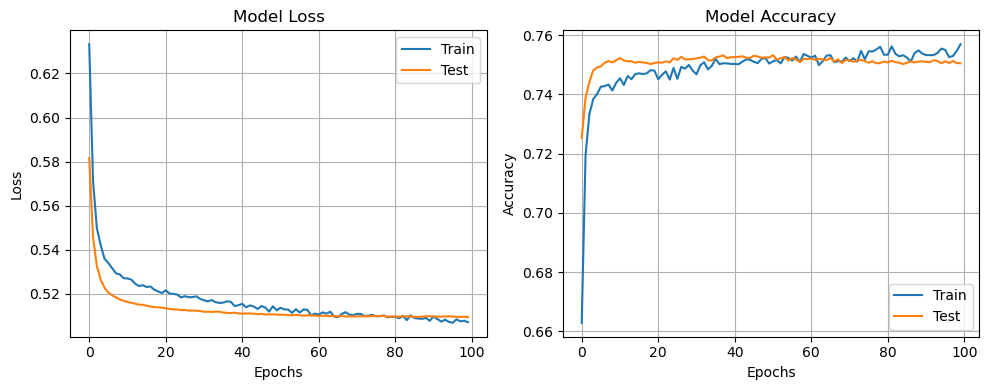

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 100, Learning Rate: 0.001
Epoch 1/100
155/155 [==============================] - 1s 3ms/step - loss: 0.5546 - accuracy: 0.7250 - val_loss: 0.5189 - val_accuracy: 0.7468
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7432 - val_loss: 0.5153 - val_accuracy: 0.7519
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.7469 - val_loss: 0.5129 - val_accuracy: 0.7502
Epoch 4/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.7488 - val_loss: 0.5125 - val_accuracy: 0.7520
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7495 - val_loss: 0.5117 - val_accuracy: 0.7536
Epoch 6/100
155/155 [==============================] - 0s 3ms/step - loss

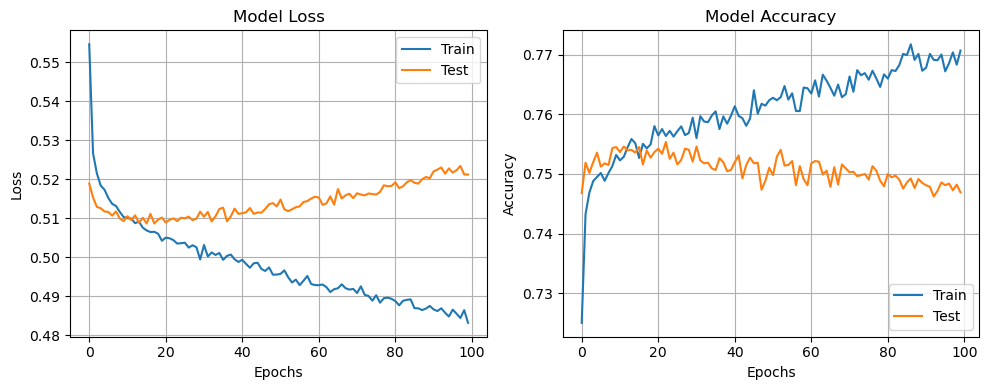

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 128, Epochs: 100, Learning Rate: 0.01
Epoch 1/100
155/155 [==============================] - 1s 3ms/step - loss: 0.5320 - accuracy: 0.7395 - val_loss: 0.5134 - val_accuracy: 0.7537
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7487 - val_loss: 0.5139 - val_accuracy: 0.7505
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7477 - val_loss: 0.5119 - val_accuracy: 0.7521
Epoch 4/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7473 - val_loss: 0.5188 - val_accuracy: 0.7533
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7499 - val_loss: 0.5214 - val_accuracy: 0.7478
Epoch 6/100
155/155 [==============================] - 0s 2ms/step - loss:

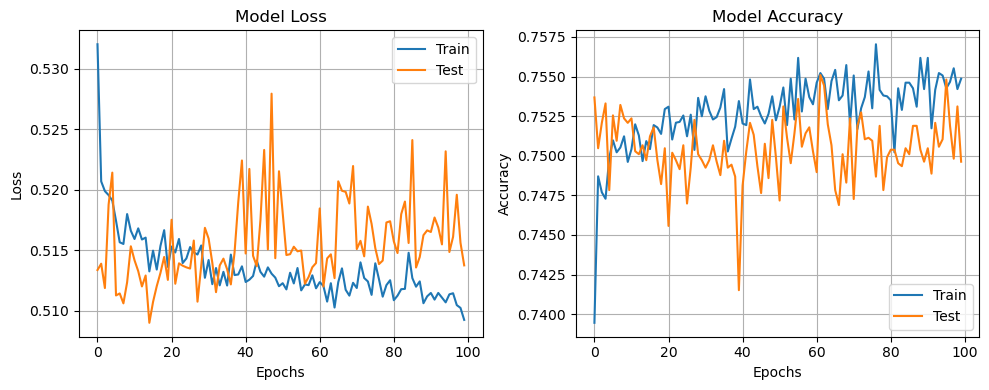

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 25, Learning Rate: 0.0001
Epoch 1/25
78/78 [==============================] - 1s 5ms/step - loss: 0.6260 - accuracy: 0.6759 - val_loss: 0.5912 - val_accuracy: 0.7169
Epoch 2/25
78/78 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7109 - val_loss: 0.5618 - val_accuracy: 0.7276
Epoch 3/25
78/78 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7257 - val_loss: 0.5447 - val_accuracy: 0.7356
Epoch 4/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7303 - val_loss: 0.5348 - val_accuracy: 0.7429
Epoch 5/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7354 - val_loss: 0.5290 - val_accuracy: 0.7452
Epoch 6/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5394 - accurac

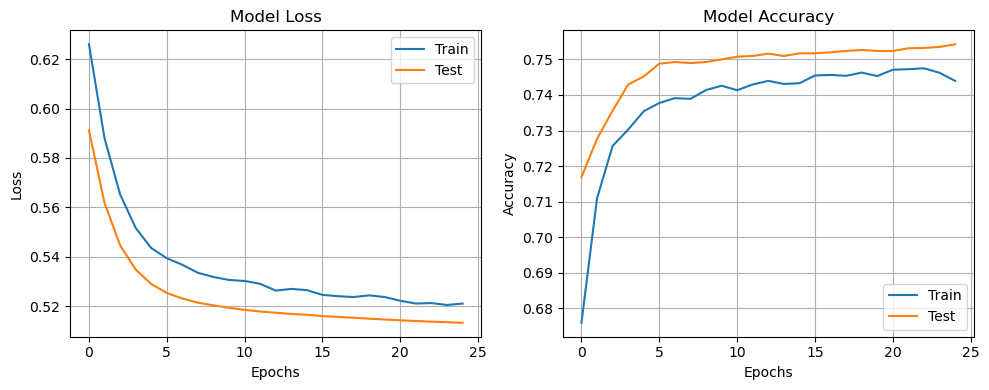

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 25, Learning Rate: 0.001
Epoch 1/25
78/78 [==============================] - 1s 5ms/step - loss: 0.5676 - accuracy: 0.7133 - val_loss: 0.5226 - val_accuracy: 0.7440
Epoch 2/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7446 - val_loss: 0.5169 - val_accuracy: 0.7484
Epoch 3/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7462 - val_loss: 0.5151 - val_accuracy: 0.7488
Epoch 4/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7474 - val_loss: 0.5130 - val_accuracy: 0.7514
Epoch 5/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7509 - val_loss: 0.5126 - val_accuracy: 0.7515
Epoch 6/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy

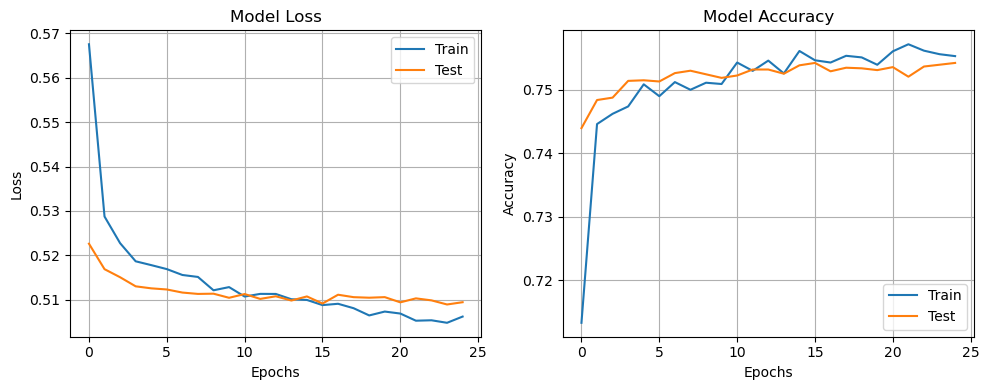

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 25, Learning Rate: 0.01
Epoch 1/25
78/78 [==============================] - 1s 4ms/step - loss: 0.5394 - accuracy: 0.7366 - val_loss: 0.5139 - val_accuracy: 0.7510
Epoch 2/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7492 - val_loss: 0.5176 - val_accuracy: 0.7526
Epoch 3/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.7489 - val_loss: 0.5192 - val_accuracy: 0.7508
Epoch 4/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7482 - val_loss: 0.5118 - val_accuracy: 0.7546
Epoch 5/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7512 - val_loss: 0.5151 - val_accuracy: 0.7509
Epoch 6/25
78/78 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy:

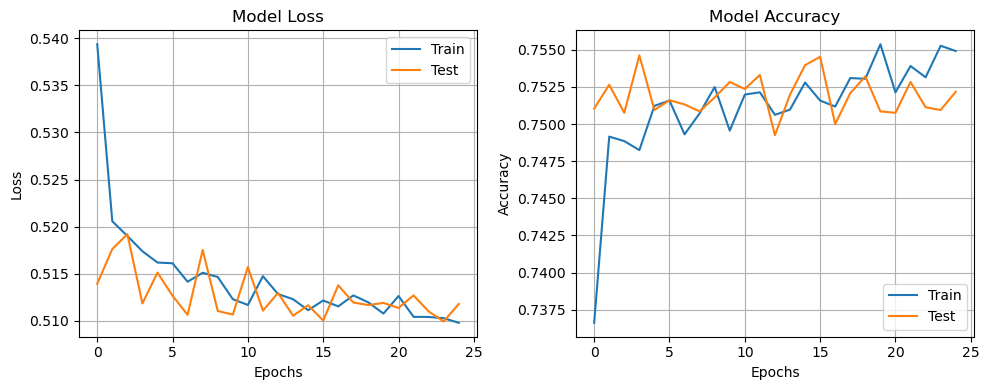

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 50, Learning Rate: 0.0001
Epoch 1/50
78/78 [==============================] - 1s 5ms/step - loss: 0.6907 - accuracy: 0.5503 - val_loss: 0.6439 - val_accuracy: 0.6479
Epoch 2/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6658 - val_loss: 0.5929 - val_accuracy: 0.7217
Epoch 3/50
78/78 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7175 - val_loss: 0.5612 - val_accuracy: 0.7350
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.7293 - val_loss: 0.5434 - val_accuracy: 0.7395
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7354 - val_loss: 0.5339 - val_accuracy: 0.7429
Epoch 6/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5399 - accurac

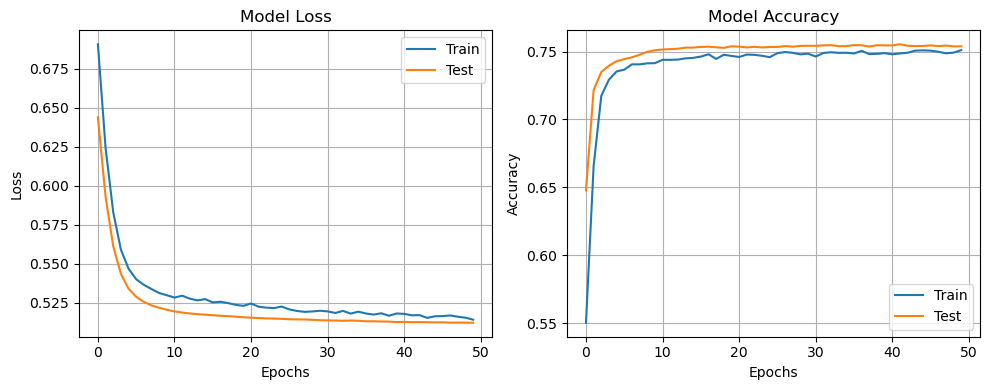

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
78/78 [==============================] - 1s 5ms/step - loss: 0.5655 - accuracy: 0.7217 - val_loss: 0.5240 - val_accuracy: 0.7468
Epoch 2/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7439 - val_loss: 0.5171 - val_accuracy: 0.7492
Epoch 3/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.7455 - val_loss: 0.5156 - val_accuracy: 0.7507
Epoch 4/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7475 - val_loss: 0.5129 - val_accuracy: 0.7514
Epoch 5/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7464 - val_loss: 0.5123 - val_accuracy: 0.7525
Epoch 6/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy

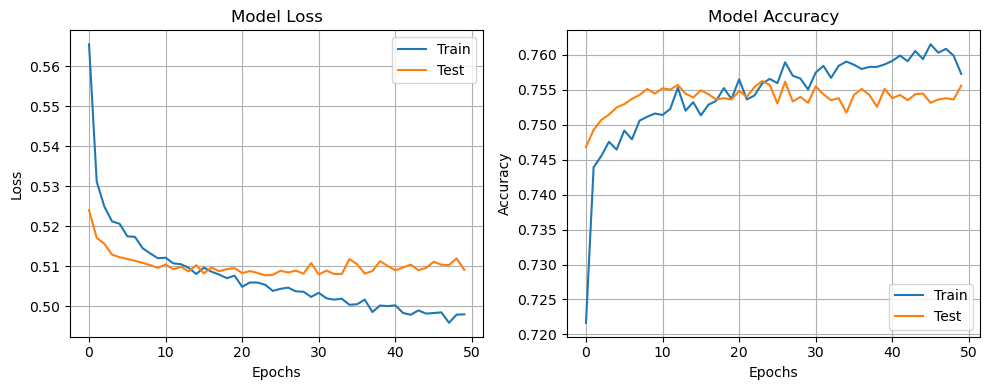

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 50, Learning Rate: 0.01
Epoch 1/50
78/78 [==============================] - 1s 4ms/step - loss: 0.5370 - accuracy: 0.7365 - val_loss: 0.5128 - val_accuracy: 0.7514
Epoch 2/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7481 - val_loss: 0.5146 - val_accuracy: 0.7517
Epoch 3/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5184 - accuracy: 0.7494 - val_loss: 0.5196 - val_accuracy: 0.7489
Epoch 4/50
78/78 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7488 - val_loss: 0.5123 - val_accuracy: 0.7537
Epoch 5/50
78/78 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7511 - val_loss: 0.5125 - val_accuracy: 0.7516
Epoch 6/50
78/78 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy:

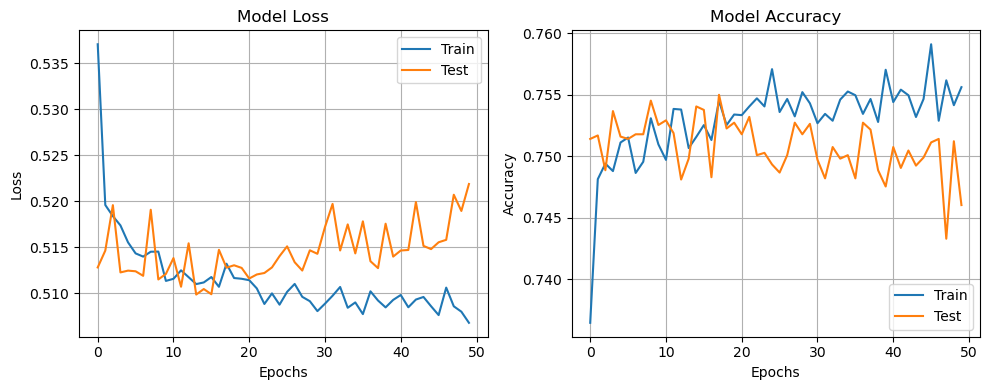

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 75, Learning Rate: 0.0001
Epoch 1/75
78/78 [==============================] - 1s 4ms/step - loss: 0.6925 - accuracy: 0.5626 - val_loss: 0.6333 - val_accuracy: 0.6726
Epoch 2/75
78/78 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6810 - val_loss: 0.5798 - val_accuracy: 0.7240
Epoch 3/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7166 - val_loss: 0.5520 - val_accuracy: 0.7341
Epoch 4/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7278 - val_loss: 0.5386 - val_accuracy: 0.7368
Epoch 5/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7302 - val_loss: 0.5318 - val_accuracy: 0.7408
Epoch 6/75
78/78 [==============================] - 0s 3ms/step - loss: 0.5422 - accurac

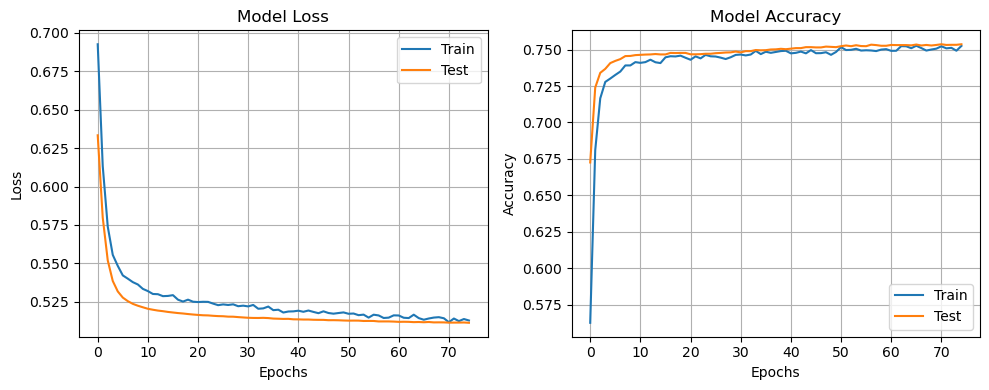

Best validation accuracy: 0.7573
Best parameters - Batch Size: 32, Epochs: 75, Learning Rate: 0.0001
Early stopping occurred at epoch: 58
 Current training with Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Epoch 1/75
78/78 [==============================] - 1s 4ms/step - loss: 0.5759 - accuracy: 0.7081 - val_loss: 0.5254 - val_accuracy: 0.7461
Epoch 2/75
78/78 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7437 - val_loss: 0.5172 - val_accuracy: 0.7500
Epoch 3/75
78/78 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7452 - val_loss: 0.5142 - val_accuracy: 0.7537
Epoch 4/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7494 - val_loss: 0.5120 - val_accuracy: 0.7545
Epoch 5/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.7487 - val_loss: 0.5117 - val_accuracy: 0.7529
Epoch 6/75
78/78 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy

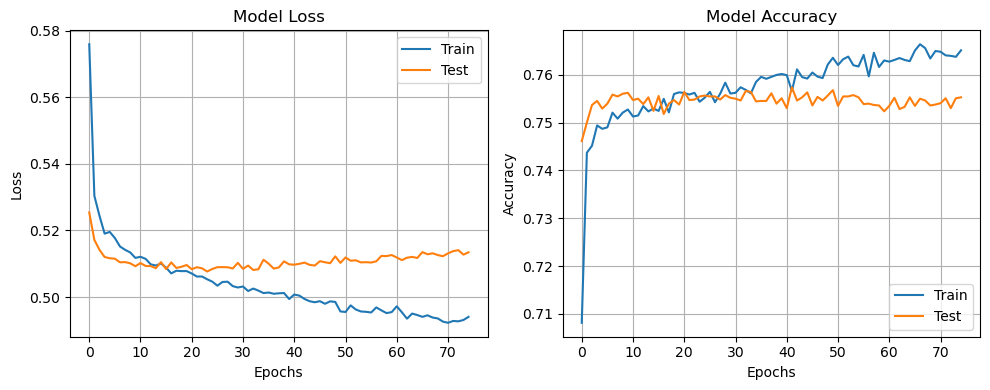

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 256, Epochs: 75, Learning Rate: 0.01
Epoch 1/75
78/78 [==============================] - 1s 4ms/step - loss: 0.5392 - accuracy: 0.7355 - val_loss: 0.5147 - val_accuracy: 0.7523
Epoch 2/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7492 - val_loss: 0.5154 - val_accuracy: 0.7501
Epoch 3/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7502 - val_loss: 0.5158 - val_accuracy: 0.7509
Epoch 4/75
78/78 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7481 - val_loss: 0.5127 - val_accuracy: 0.7528
Epoch 5/75
78/78 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7512 - val_loss: 0.5128 - val_accuracy: 0.7492
Epoch 6/75
78/78 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy:

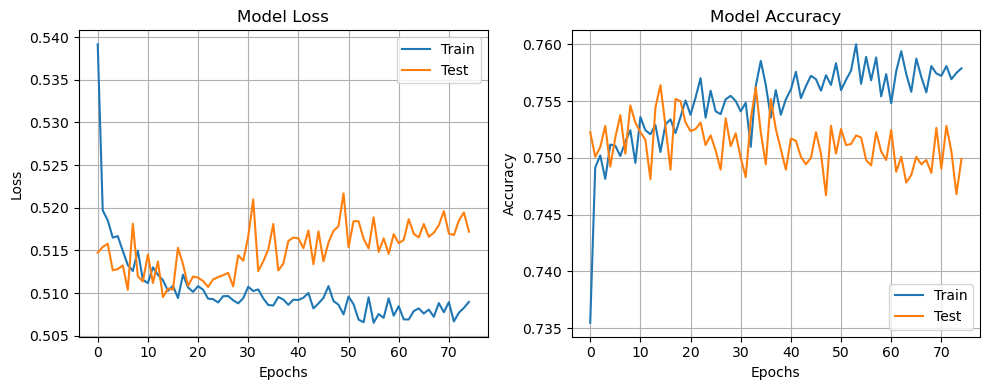

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 256, Epochs: 100, Learning Rate: 0.0001
Epoch 1/100
78/78 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.5480 - val_loss: 0.6500 - val_accuracy: 0.6626
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6836 - val_loss: 0.5973 - val_accuracy: 0.7217
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.7201 - val_loss: 0.5641 - val_accuracy: 0.7353
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7309 - val_loss: 0.5453 - val_accuracy: 0.7409
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7326 - val_loss: 0.5351 - val_accuracy: 0.7447
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5415 - 

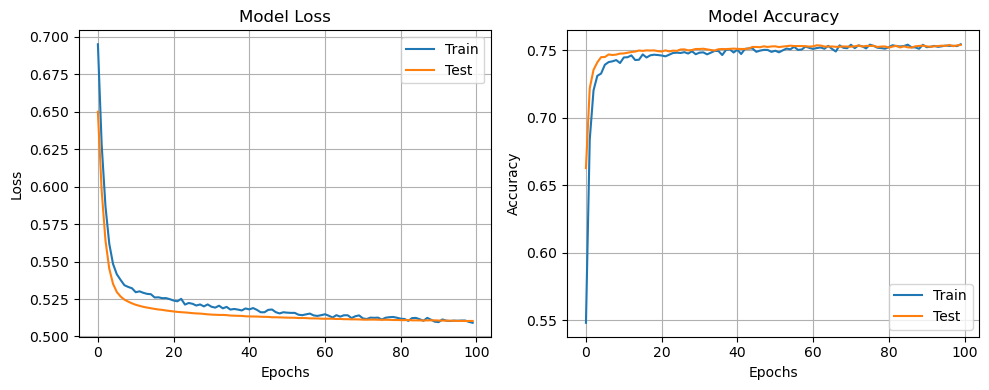

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 256, Epochs: 100, Learning Rate: 0.001
Epoch 1/100
78/78 [==============================] - 1s 5ms/step - loss: 0.5682 - accuracy: 0.7127 - val_loss: 0.5210 - val_accuracy: 0.7508
Epoch 2/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7442 - val_loss: 0.5152 - val_accuracy: 0.7514
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7467 - val_loss: 0.5150 - val_accuracy: 0.7527
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5212 - accuracy: 0.7500 - val_loss: 0.5117 - val_accuracy: 0.7557
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7483 - val_loss: 0.5112 - val_accuracy: 0.7550
Epoch 6/100
78/78 [==============================] - 0s 2ms/step - loss: 0.5178 - a

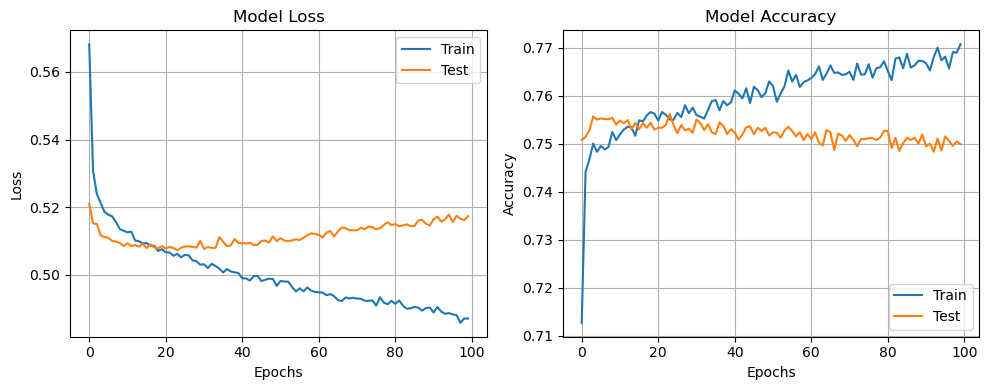

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 256, Epochs: 100, Learning Rate: 0.01
Epoch 1/100
78/78 [==============================] - 1s 4ms/step - loss: 0.5379 - accuracy: 0.7372 - val_loss: 0.5117 - val_accuracy: 0.7529
Epoch 2/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7479 - val_loss: 0.5141 - val_accuracy: 0.7520
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7483 - val_loss: 0.5163 - val_accuracy: 0.7517
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.7484 - val_loss: 0.5113 - val_accuracy: 0.7540
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5160 - accuracy: 0.7500 - val_loss: 0.5107 - val_accuracy: 0.7514
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.5147 - ac

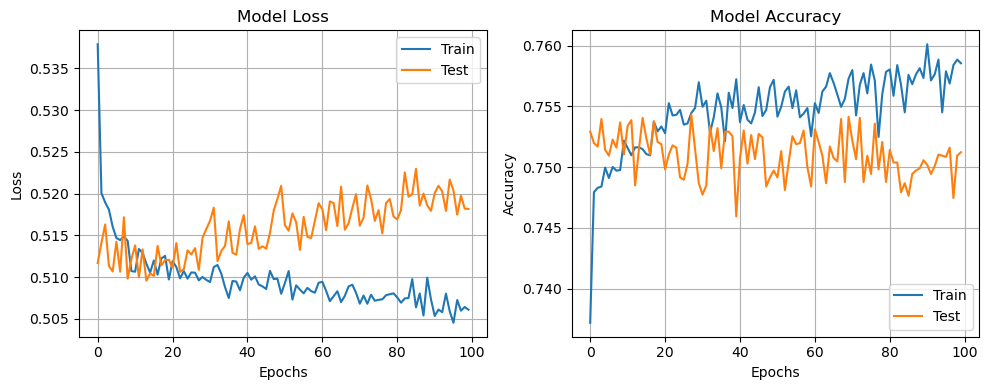

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 25, Learning Rate: 0.0001
Epoch 1/25
39/39 [==============================] - 1s 7ms/step - loss: 0.7125 - accuracy: 0.5133 - val_loss: 0.6796 - val_accuracy: 0.6075
Epoch 2/25
39/39 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6188 - val_loss: 0.6412 - val_accuracy: 0.6681
Epoch 3/25
39/39 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6666 - val_loss: 0.6118 - val_accuracy: 0.6995
Epoch 4/25
39/39 [==============================] - 0s 3ms/step - loss: 0.6104 - accuracy: 0.6909 - val_loss: 0.5895 - val_accuracy: 0.7127
Epoch 5/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.7057 - val_loss: 0.5722 - val_accuracy: 0.7221
Epoch 6/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5752 - accurac

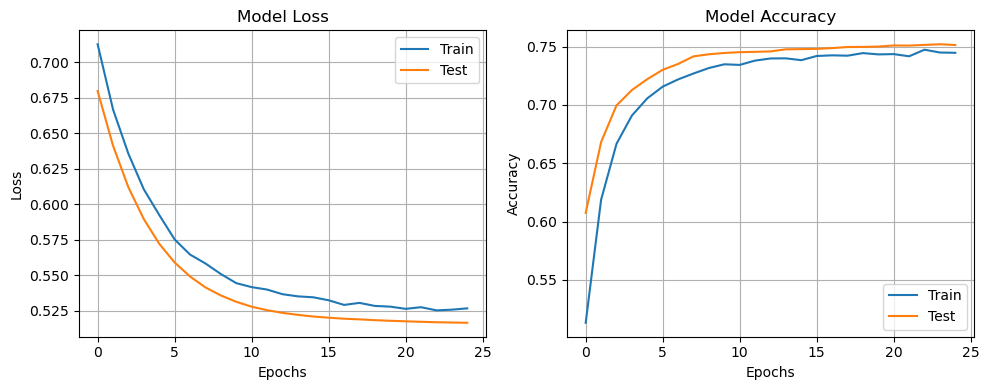

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 25, Learning Rate: 0.001
Epoch 1/25
39/39 [==============================] - 1s 7ms/step - loss: 0.5953 - accuracy: 0.6928 - val_loss: 0.5363 - val_accuracy: 0.7399
Epoch 2/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.7403 - val_loss: 0.5209 - val_accuracy: 0.7517
Epoch 3/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7438 - val_loss: 0.5179 - val_accuracy: 0.7509
Epoch 4/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.7435 - val_loss: 0.5158 - val_accuracy: 0.7524
Epoch 5/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7476 - val_loss: 0.5151 - val_accuracy: 0.7519
Epoch 6/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy

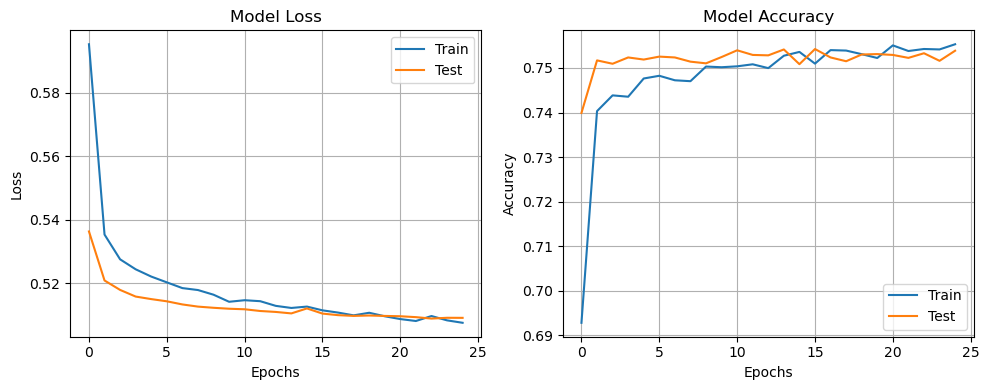

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 25, Learning Rate: 0.01
Epoch 1/25
39/39 [==============================] - 1s 7ms/step - loss: 0.5406 - accuracy: 0.7344 - val_loss: 0.5159 - val_accuracy: 0.7504
Epoch 2/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7474 - val_loss: 0.5119 - val_accuracy: 0.7537
Epoch 3/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5180 - accuracy: 0.7509 - val_loss: 0.5123 - val_accuracy: 0.7516
Epoch 4/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7511 - val_loss: 0.5108 - val_accuracy: 0.7560
Epoch 5/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7507 - val_loss: 0.5117 - val_accuracy: 0.7529
Epoch 6/25
39/39 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy:

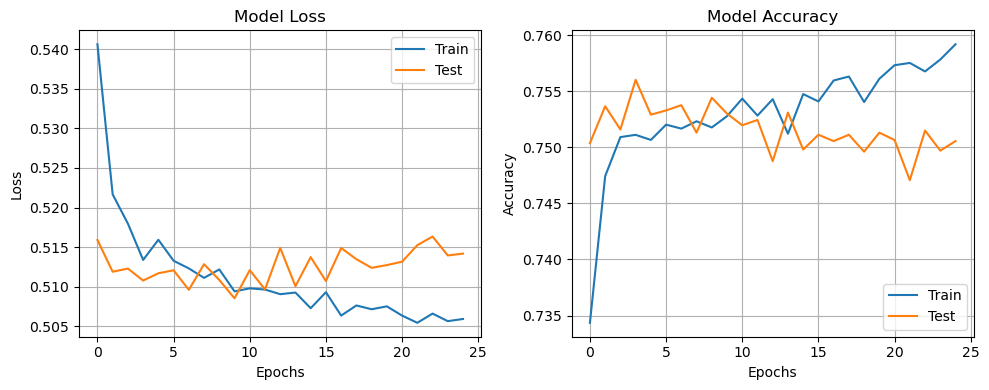

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 50, Learning Rate: 0.0001
Epoch 1/50
39/39 [==============================] - 1s 7ms/step - loss: 0.7142 - accuracy: 0.5234 - val_loss: 0.6807 - val_accuracy: 0.5801
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.6094 - val_loss: 0.6418 - val_accuracy: 0.6591
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6584 - val_loss: 0.6113 - val_accuracy: 0.7023
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6096 - accuracy: 0.6918 - val_loss: 0.5877 - val_accuracy: 0.7189
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7102 - val_loss: 0.5697 - val_accuracy: 0.7276
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5749 - accurac

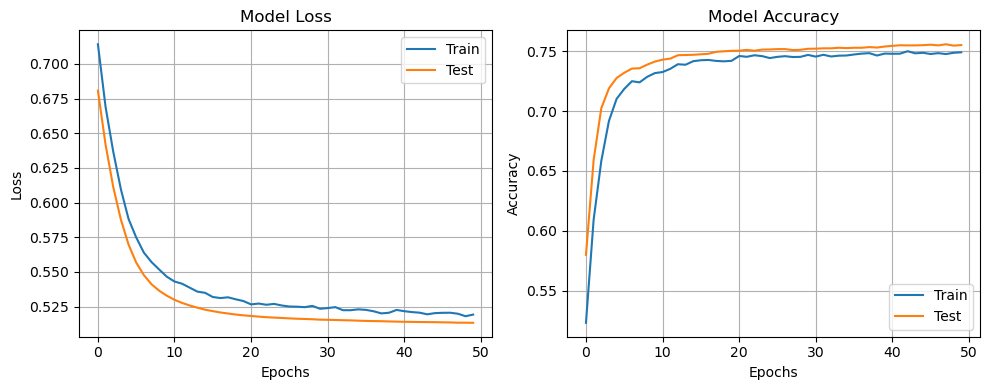

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 50, Learning Rate: 0.001
Epoch 1/50
39/39 [==============================] - 1s 7ms/step - loss: 0.5818 - accuracy: 0.7091 - val_loss: 0.5282 - val_accuracy: 0.7419
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7402 - val_loss: 0.5195 - val_accuracy: 0.7497
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7465 - val_loss: 0.5172 - val_accuracy: 0.7512
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.7464 - val_loss: 0.5153 - val_accuracy: 0.7514
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7475 - val_loss: 0.5145 - val_accuracy: 0.7537
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy

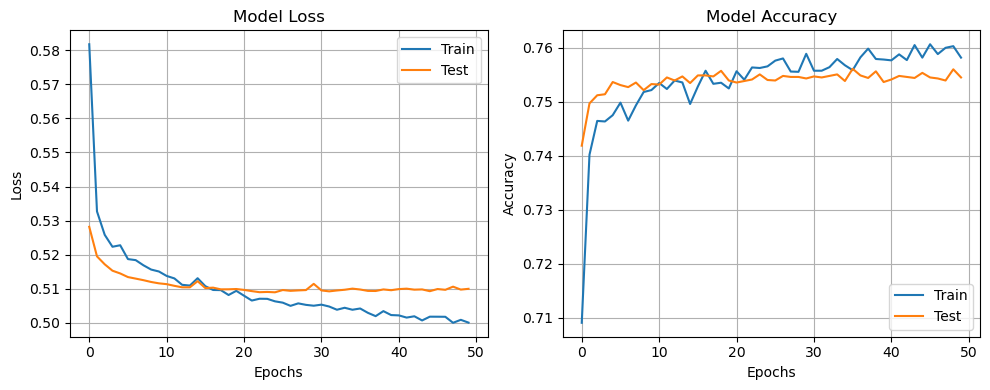

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 50, Learning Rate: 0.01
Epoch 1/50
39/39 [==============================] - 1s 19ms/step - loss: 0.5435 - accuracy: 0.7338 - val_loss: 0.5155 - val_accuracy: 0.7509
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.7466 - val_loss: 0.5121 - val_accuracy: 0.7551
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7516 - val_loss: 0.5115 - val_accuracy: 0.7536
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.7504 - val_loss: 0.5119 - val_accuracy: 0.7557
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7511 - val_loss: 0.5105 - val_accuracy: 0.7529
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy

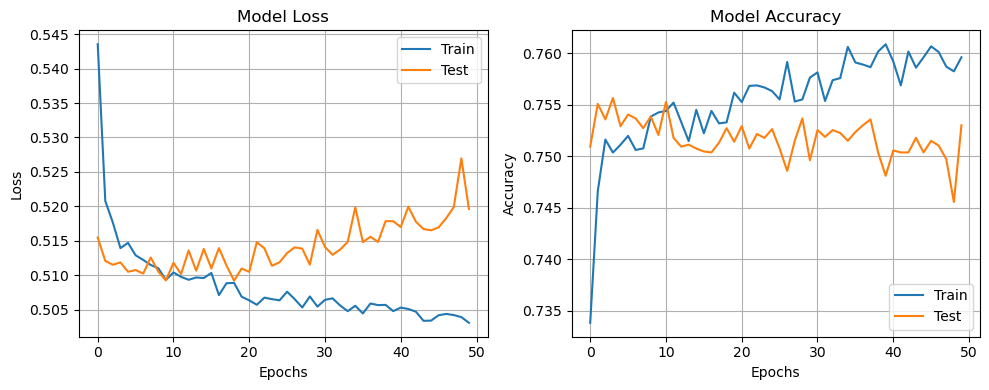

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 75, Learning Rate: 0.0001
Epoch 1/75
39/39 [==============================] - 1s 7ms/step - loss: 0.7192 - accuracy: 0.5261 - val_loss: 0.6858 - val_accuracy: 0.5611
Epoch 2/75
39/39 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5818 - val_loss: 0.6502 - val_accuracy: 0.6365
Epoch 3/75
39/39 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.6388 - val_loss: 0.6216 - val_accuracy: 0.6829
Epoch 4/75
39/39 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6745 - val_loss: 0.5985 - val_accuracy: 0.7072
Epoch 5/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.6960 - val_loss: 0.5798 - val_accuracy: 0.7177
Epoch 6/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5834 - accurac

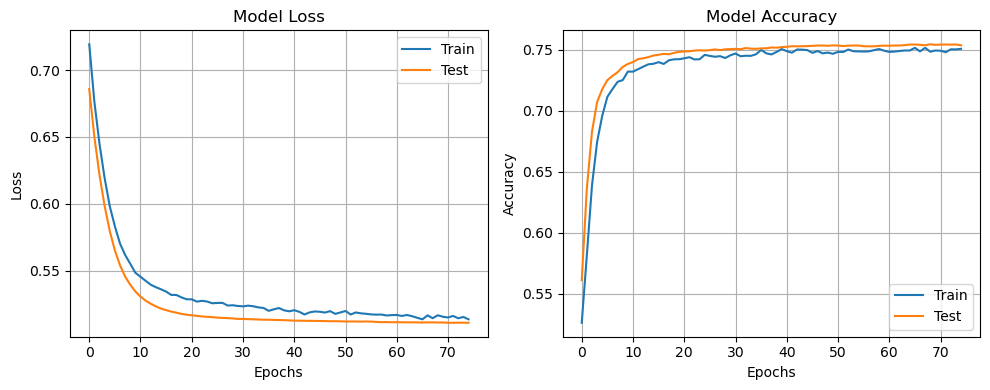

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 75, Learning Rate: 0.001
Epoch 1/75
39/39 [==============================] - 1s 5ms/step - loss: 0.5933 - accuracy: 0.6900 - val_loss: 0.5283 - val_accuracy: 0.7478
Epoch 2/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7417 - val_loss: 0.5181 - val_accuracy: 0.7490
Epoch 3/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7427 - val_loss: 0.5155 - val_accuracy: 0.7497
Epoch 4/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7455 - val_loss: 0.5138 - val_accuracy: 0.7529
Epoch 5/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5217 - accuracy: 0.7457 - val_loss: 0.5131 - val_accuracy: 0.7529
Epoch 6/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy

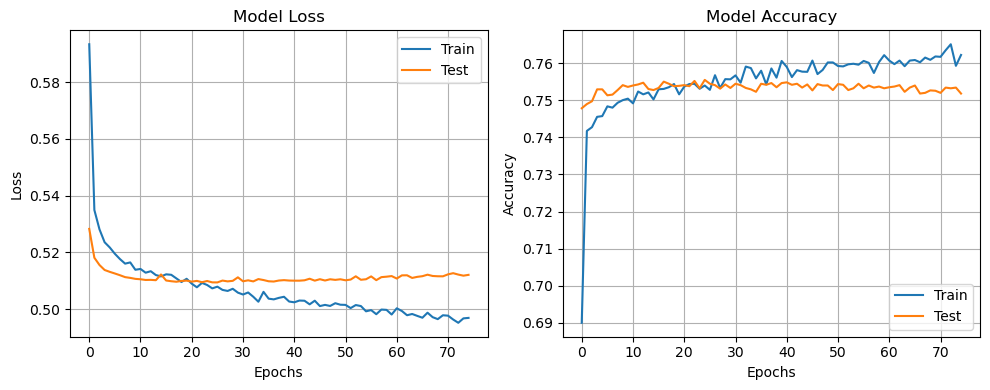

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 75, Learning Rate: 0.01
Epoch 1/75
39/39 [==============================] - 1s 7ms/step - loss: 0.5435 - accuracy: 0.7330 - val_loss: 0.5163 - val_accuracy: 0.7500
Epoch 2/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7469 - val_loss: 0.5128 - val_accuracy: 0.7543
Epoch 3/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.7513 - val_loss: 0.5136 - val_accuracy: 0.7514
Epoch 4/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7496 - val_loss: 0.5119 - val_accuracy: 0.7543
Epoch 5/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.7518 - val_loss: 0.5104 - val_accuracy: 0.7525
Epoch 6/75
39/39 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy:

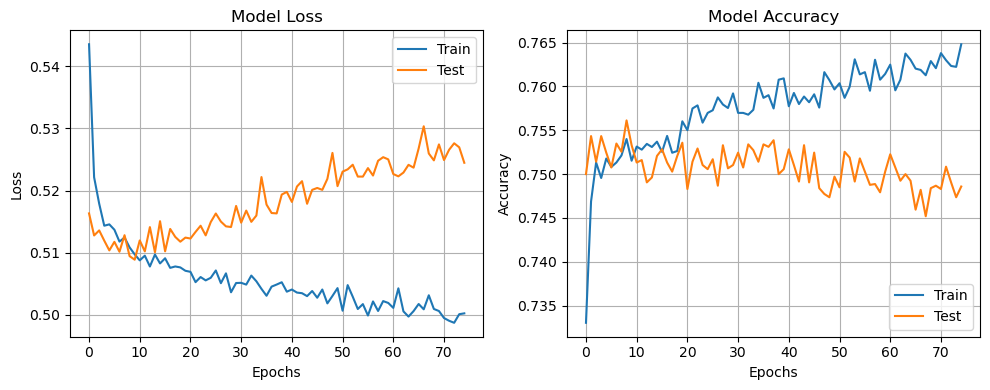

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 100, Learning Rate: 0.0001
Epoch 1/100
39/39 [==============================] - 1s 5ms/step - loss: 0.7170 - accuracy: 0.5329 - val_loss: 0.6727 - val_accuracy: 0.5741
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.6045 - val_loss: 0.6268 - val_accuracy: 0.6574
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6671 - val_loss: 0.5947 - val_accuracy: 0.7047
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.7022 - val_loss: 0.5723 - val_accuracy: 0.7185
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.7142 - val_loss: 0.5566 - val_accuracy: 0.7287
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5613 - 

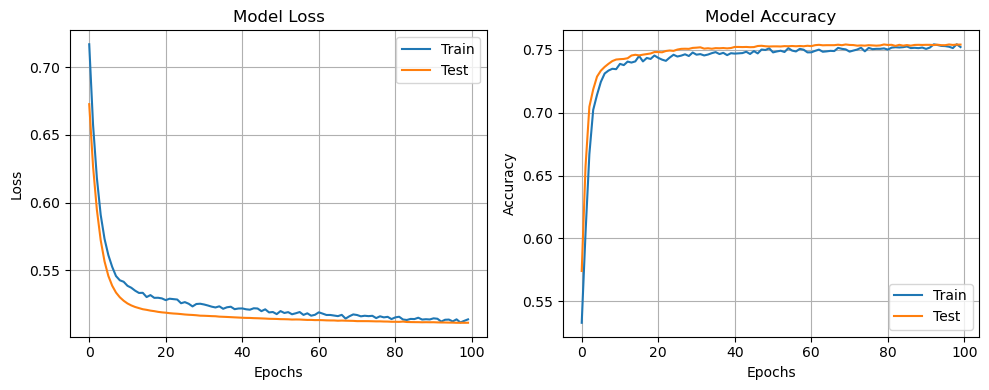

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 100, Learning Rate: 0.001
Epoch 1/100
39/39 [==============================] - 1s 7ms/step - loss: 0.5981 - accuracy: 0.6907 - val_loss: 0.5318 - val_accuracy: 0.7406
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5379 - accuracy: 0.7369 - val_loss: 0.5186 - val_accuracy: 0.7494
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5288 - accuracy: 0.7420 - val_loss: 0.5158 - val_accuracy: 0.7520
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7434 - val_loss: 0.5136 - val_accuracy: 0.7521
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7452 - val_loss: 0.5125 - val_accuracy: 0.7543
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5201 - a

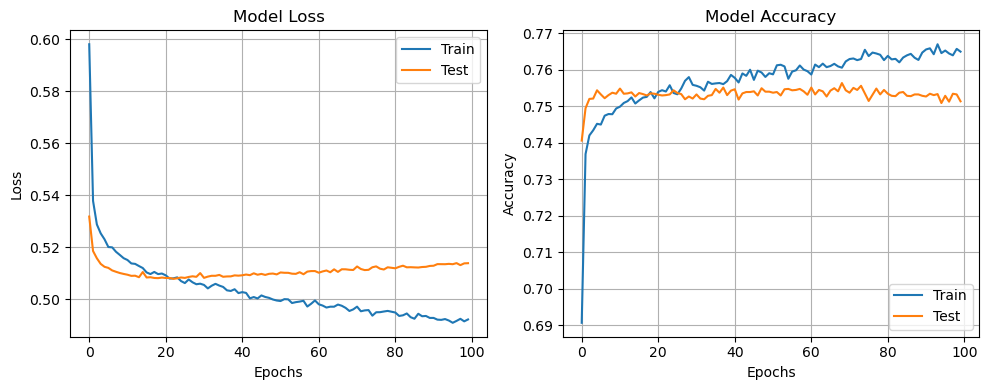

Best validation accuracy: 0.7574
Best parameters - Batch Size: 256, Epochs: 75, Learning Rate: 0.001
Early stopping occurred at epoch: 42
 Current training with Batch Size: 512, Epochs: 100, Learning Rate: 0.01
Epoch 1/100
39/39 [==============================] - 1s 7ms/step - loss: 0.5437 - accuracy: 0.7310 - val_loss: 0.5161 - val_accuracy: 0.7489
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7472 - val_loss: 0.5116 - val_accuracy: 0.7530
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7497 - val_loss: 0.5104 - val_accuracy: 0.7542
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7508 - val_loss: 0.5100 - val_accuracy: 0.7580
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7512 - val_loss: 0.5099 - val_accuracy: 0.7558
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.5125 - ac

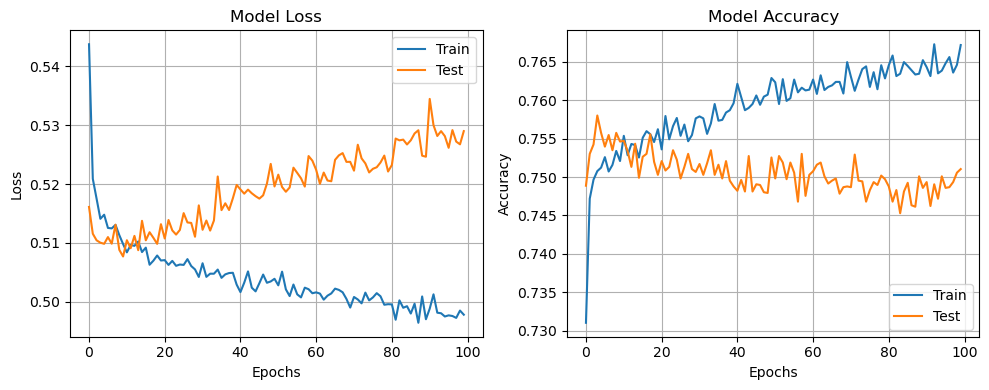

Best validation accuracy: 0.7580
Best parameters - Batch Size: 512, Epochs: 100, Learning Rate: 0.01
Early stopping occurred at epoch: 4


In [433]:
best_accuracy = 0.0
best_params = {'batch_size': None, 
               'epochs': None, 
               'early_stopping_epoch': None, 
               'learning_rate': None}

for batchSize in [32, 64, 128, 256, 512]:
    for epochCount in [25, 50, 75, 100]:
        for learning_rate in [0.0001, 0.001, 0.01]:

            print(f" Current training with Batch Size: {batchSize}, Epochs: {epochCount}, Learning Rate: {learning_rate}")

            tf.keras.backend.clear_session()
            model = models.Sequential()
            model.add(layers.Dense(64, activation='relu', 
                                kernel_regularizer=regularizers.l2(0.0001), 
                                input_shape=(x_train.shape[1],)))

            model.add(layers.Dropout(0.1)) 
            model.add(layers.Dense(64, activation='relu', 
                                kernel_regularizer=regularizers.l2(0.0001)))

            model.add(layers.Dropout(0.1))   
            model.add(layers.Dense(1, activation='sigmoid'))

            model.compile(
                optimizer=optimizers.Adam(learning_rate=learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy']
            )

            history = model.fit(
                partial_x_train,
                partial_y_train,
                epochs=epochCount, 
                batch_size=batchSize,
                validation_data=(x_val, y_val),
            
            )
            
            # Call early stopping function to print and get the best accuracy epoch
            early_stopping_loss_epoch = np.argmin(history.history["val_loss"]) + 1
            early_stopping_acc_epoch = np.argmax(history.history["val_accuracy"]) + 1
            val_accuracy = history.history['val_accuracy'][early_stopping_acc_epoch - 1]

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params['batch_size'] = batchSize
                best_params['epochs'] = epochCount
                best_params['early_stopping_epoch'] = early_stopping_acc_epoch
                best_params['learning_rate'] = learning_rate
                
            plot_history(history)

            # After all iterations, print out the best results
            print(f"Best validation accuracy: {best_accuracy:.4f}")
            print(f"Best parameters - Batch Size: {best_params['batch_size']}, Epochs: {best_params['epochs']}, Learning Rate: {best_params['learning_rate']}")
            print(f"Early stopping occurred at epoch: {best_params['early_stopping_epoch']}")


### Build the final model on the entire dataet

In [434]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001), 
                       input_shape=(x_train.shape[1],)))

model.add(layers.Dropout(0.1)) 
model.add(layers.Dense(64, activation='relu', 
                       kernel_regularizer=regularizers.l2(0.0001)))

model.add(layers.Dropout(0.1))   
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Train the entire dataset

In [439]:
history = model.fit(
    x_train,
    y_train,
    epochs= best_params['early_stopping_epoch'], 
    batch_size=best_params['batch_size'],
    validation_data = (x_val, y_val),
    )

Epoch 1/4
97/97 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7489 - val_loss: 0.5111 - val_accuracy: 0.7536
Epoch 2/4
97/97 [==============================] - 0s 2ms/step - loss: 0.5148 - accuracy: 0.7510 - val_loss: 0.5090 - val_accuracy: 0.7537
Epoch 3/4
97/97 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7519 - val_loss: 0.5093 - val_accuracy: 0.7541
Epoch 4/4
97/97 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7509 - val_loss: 0.5072 - val_accuracy: 0.7537


In [440]:
model.evaluate(x_test, y_test)

332/332 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.7547


[0.5086009502410889, 0.7547152042388916]

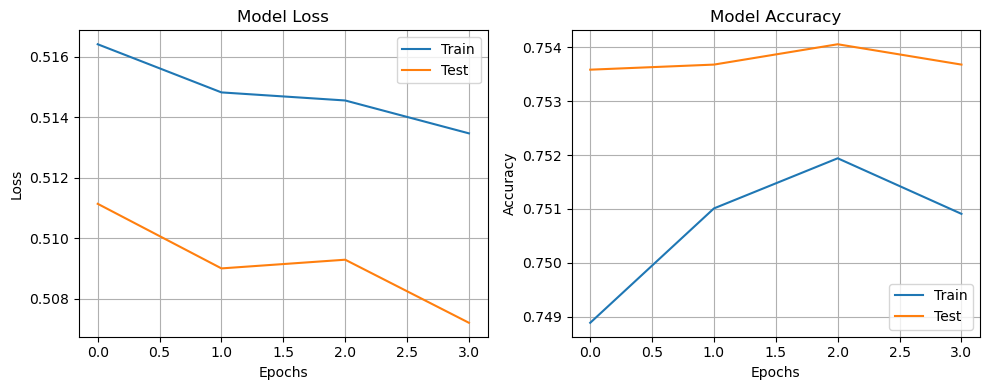

In [441]:
plot_history(history)

### Evaluation

### Conclusion